<div class="alert alert-block alert-info">
    <h1> Lending Club Case Study (EDA) </h1>
</div>

<img src="https://assets.fullertonindia.com/sites/default/files/avoid-rejection.png?T3YH0sJ0xdR8lc39yvBGe52AFfkKsAL2">

### Table of Contents

* [Problem Statement](#section1)
    * [Project Brief](#section101)
    * [Business Understanding](#section102)
    * [Business Objective](#section103)
* [Data Description](#section2)
    * [Importing Packages](#section201)
    * [Importing the Dataset](#section202)
* [Data Cleaning and Manipulation](#section3)
    * [Inspecting Null Values](#section301)
    * [Dropping unnecessary Columns](#section302)
    * [Dropping unnecessary rows](#section303)
    * [Datatype Correction](#section304)
    * [Standardizing Values](#section305)
    * [Create new Features](#section306)
* [Exploratory Data Analysis](#section4)
    * [Feature Categorization](#section403)   
    * [Univariate Analysis](#section401)
        * [Distribution of Loan Status](#section4011)
        * [Top Purpose for Loans](#section4012)
        * [Frequency of Approved Loans from 2007 to 2011](#section4013)
        * [Analyzing Amount and Interest Rates](#section4014)
        * [Analyzing Annual Income of Loan Applicants](#section4015)
        * [Analyzing Employment Length of Loan Applicants](#section4016)
        * [Analyzing dti Rate of Loan Applicants](#section4017)
        * [Analysis on Open Account over Loan Status](#section4018)
        * [Analysis on Total Account over Loan Status](#section4019)
    * [Bivariate/Multivariate Analysis](#section402)
        * [Analysis on Region](#section4021)
        * [Analysis on Interest Rate](#section4022)
        * [Analysis on Interest Rate over Region](#section4023)
        * [Analysis on Interest Rate with Grades](#section4024)
        * [Analysis on Annual Income Category](#section4025)
        * [Analysis on Grade and Sub-Grade](#section4026)
        * [Analysis on Debt-to-Income Rate](#section4027)
        * [Analysis on Verification Status](#section4028)
        * [Analysis on Term](#section4029)
        * [Analysis on Employment Length](#section4030)
        * [Analysis on Purpose](#section4031)
        * [Analysis on Home Ownership](#section4032)
        * [Analysis on Yearly and Montly Loans](#section4033)
        * [Analysis on Top Purpose loans for highest Defaulted Months](#section40331)  
        * [Analysis on derogatory behavior over loan status](#section4034)
        * [Analysis on Bankruptcies behavior over loan status](#section4035)
        * [Analysis on loan amount related columns](#section4036)
* [Conclusion](#section5)
* [Recommendations](#section6)

<a id=section1></a>
# Problem Statement

<a id=section101></a>
## Project Brief

You work for a `consumer finance company` which specialises in __lending various types of loans__ to urban customers. When the company __receives a loan application__, the company has to __make a decision__ for loan approval based on the __applicant’s profile__.


<a id=section102></a>
## Business Understanding

- Customers interested in a loan complete a simple application at `LendingClub.com`.

- Lending Club evaluates each borrower's credit score using their data science process which uses past historical data and assigns an interest rate to the borrower.

- When a person __applies for a loan__, there are __two types of decisions__ that could be taken by the Lending Club:
    - `Loan Accepted`
    - `Loan Rejected` <br/>

- If the Lending Club __approves the loan__, there are __3 possible scenarios__ described below:
    - `Fully paid`: Applicant has fully paid the loan (the principal and the interest rate)

    - `Current`: Applicant is in the process of paying the installments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    - `Charged-off`: Applicant has not paid the installments in due time for a long period of time, i.e. he/she has defaulted on the loan 

- Investors select the loans they want to invest in based on their own risk tolerance, investment portfolio goals, and time horizon.

<a id=section103></a>
## Business Objective

The objective is to identify `patterns` which indicate if a `person is likely to default`, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

If one is able to __identify these risky loan applicants__, then such loans can be reduced thereby cutting down the amount of credit loss. 

The company wants to understand the `driving factors` __(or driver variables)__ behind loan default, i.e. the variables which are __strong indicators of default__.  The company can utilise this knowledge for its __portfolio and risk assessment.__

<a id=section2></a>
# Data Loading and Description

There dataset contains complete __loan data__ for all loans __issued__ through the time period `2007 to 2011`.
<br>
The dataset provided contains `39717` Observations and `111` features.

<a id=section201></a>
### Importing Packages

In [1]:
#Importing Packages
import numpy as np                                  # Implements milti-dimensional array and matrices
import pandas as pd                                 # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                     # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                               # Provides a high level interface for drawing attractive and informative statistical graphics
import math
%matplotlib inline
sns.set()

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)  #Setting option to display max columns
pd.set_option('display.max_rows', None)  #Setting option to display max columns



<a id=section202></a>
### Importing the Dataset

In [2]:
#Importing dataset 
loan=pd.read_csv('loan.csv')
loan.head()        #Checking the top 5 records in the loan dataset

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
loan.shape  #Checking loan shape

(39717, 111)

In [4]:
loan.info(verbose=True, null_counts=True) #Checking Loan info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

We can clearly see many columns have `missing values` which needs to be __dropped or treated__ accordingly

In [5]:
loan.describe()   #Check loan describe

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

- Minimum amount funded by Investor is `0` which means Investor can choose to not invest if they consider the investment risky
- `Annual income` of the borrower looks __right skewed__ which means there are applicants with very high annual income

<a id=section3></a>
# Data Cleaning and Manipulation

<img src="https://miro.medium.com/focal/1200/1200/48/59/1*wK8k8Vo8_c6jdYIjUWL_Pw.png" style="width: 500px; height: 450px;">



In [6]:
loan.columns  #Check columns for loan DataFrame

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

<a id=section301></a>
##  Inspecting Null Values

In [7]:
#Check for null values
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [8]:
#Checking Percentage of missing records
(loan.isnull().sum()/loan.shape[0])*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

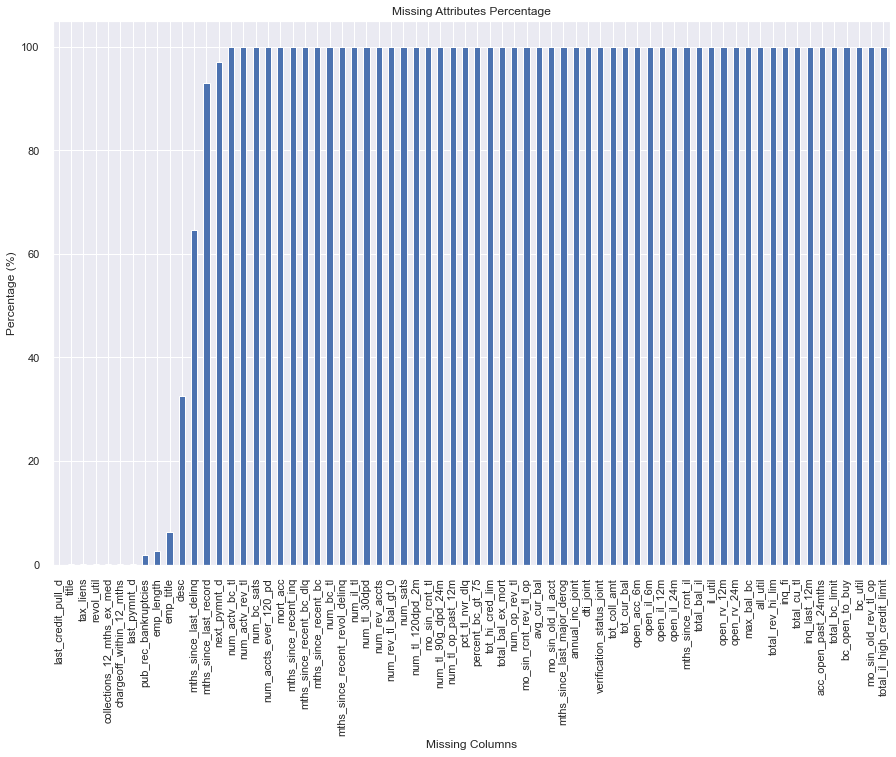

In [9]:
# Find Missing Values in Loan Dataset*/
plt.figure(figsize=(15,10))
missing=(loan.isnull().sum()/loan.shape[0])*100
missing= missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.ylabel('Percentage (%)')
plt.xlabel('Missing Columns')
plt.title("Missing Attributes Percentage")
plt.show()

Lot of columns have `100%` missing data. Let's find out how many columns have missing data

In [10]:
#Define Missing Percentage Group
def missing_pct(pct):
    if pct==100.0:
        return '100%'
    elif (pct>= 90.0 and pct<100.0):
        return '90%-100%'
    elif (pct>=10.0 and pct<90.0):
        return '10%-90%'
    elif (pct>0.0 and pct<10.0):
        return '0%-10%'
    else:
        return '0%'

In [11]:
#Create Missing Values DataFrame
missing_values = missing.to_frame()
missing_values.columns = ['pct']
missing_values['Name'] = missing.index
missing_values=missing_values.reset_index(drop=True)
#Create Missing Percentage Bucket 
missing_values['missing_bucket']=missing_values['pct'].apply(missing_pct)
missing_values.head()

,pct,Name,missing_bucket
0,0.005036,last_credit_pull_d,0%-10%
1,0.027696,title,0%-10%
2,0.098195,tax_liens,0%-10%
3,0.125891,revol_util,0%-10%
4,0.140998,collections_12_mths_ex_med,0%-10%


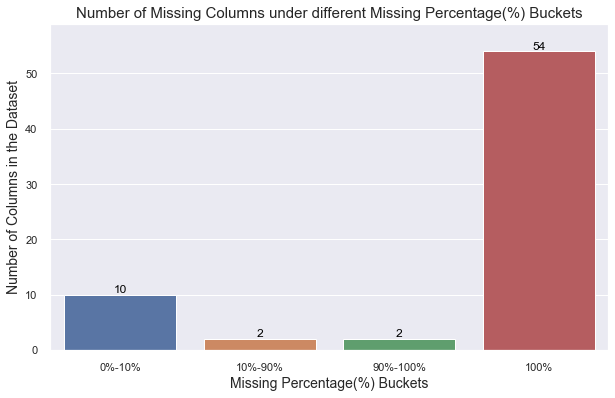

In [12]:
#Plot Graph with Missing Percentage Bucket and Number of Columns in each Bucket
#Creating 2 axes
f,ax = plt.subplots(figsize=(10,6))
#Set group of Missing Values Percentage
sns.countplot(x='missing_bucket',data=missing_values,ax=ax)
plt.title('Number of Missing Columns under different Missing Percentage(%) Buckets',fontsize=15)
plt.xlabel('Missing Percentage(%) Buckets',fontsize=14)
plt.ylabel('Number of Columns in the Dataset',fontsize=14)

# ylim max value to be set
y_max = missing_values['missing_bucket'].value_counts().max() 
ax.set_ylim([0, math.ceil(y_max)+5])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

#### 54 Columns can be dropped as it has `100%` of the missing values
#### 2 Columns can be dropped which have missing values `>90%`
#### We can also drop columns under `10%-90%` bucket, but only after reviewing and confirming if they are not important to the business use case

<a id=section302></a>
##  Dropping unnecessary Columns

In [13]:
loan.shape #Check Shape before Dropping

(39717, 111)

In [14]:
#Find list of columns which have more than 50% Missing Values
drop_col=missing_values[(missing_values.pct>50.0)].Name
drop_col=np.array(drop_col)
drop_col

array(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats',
       'num_accts_ever_120_pd', 'mort_acc', 'mths_since_recent_inq',
       'mths_since_recent_bc_dlq', 'mths_since_recent_bc', 'num_bc_tl',
       'mths_since_recent_revol_delinq', 'num_il_tl', 'num_tl_30dpd',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'mo_sin_rcnt_tl', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'num_op_rev_tl',
       'mo_sin_rcnt_rev_tl_op', 'avg_cur_bal', 'mo_sin_old_il_acct',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total

Based on the analysis, we decided to drop columns more than `50%` of the missing data

In [15]:
#Dropping list of unnecessary columns
loan=loan.drop(drop_col,axis=1) 
loan.shape

(39717, 54)

In [16]:
#Check Columns with Distinct Value = 1 (Constant value)
constant_col=[]
for x in loan.columns:
    if loan[x].nunique()==1:
        constant_col.append(x)
        
constant_col


['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [17]:
#Find unique values for the above colummns
for x in constant_col:
    print ('The feature is {} and value of categories are {}'.format(x,loan[x].unique()))

The feature is pymnt_plan and value of categories are ['n']
The feature is initial_list_status and value of categories are ['f']
The feature is collections_12_mths_ex_med and value of categories are [ 0. nan]
The feature is policy_code and value of categories are [1]
The feature is application_type and value of categories are ['INDIVIDUAL']
The feature is acc_now_delinq and value of categories are [0]
The feature is chargeoff_within_12_mths and value of categories are [ 0. nan]
The feature is delinq_amnt and value of categories are [0]
The feature is tax_liens and value of categories are [ 0. nan]


In [18]:
#Replace "Missing" as Label for the missing values above
loan.collections_12_mths_ex_med = loan.collections_12_mths_ex_med.fillna('MISSING')
loan.chargeoff_within_12_mths = loan.chargeoff_within_12_mths.fillna('MISSING')
loan.tax_liens = loan.tax_liens.fillna('MISSING')

In [19]:
#Check the value count of the columns with contains missing values
print ('collections_12_mths_ex_med: \n' , loan.collections_12_mths_ex_med.value_counts())
print ('---------------------------')
print ('chargeoff_within_12_mths: \n', loan.chargeoff_within_12_mths.value_counts())
print ('---------------------------')
print ('tax_liens: \n', loan.tax_liens.value_counts())

collections_12_mths_ex_med: 
 0.0        39661
MISSING       56
Name: collections_12_mths_ex_med, dtype: int64
---------------------------
chargeoff_within_12_mths: 
 0.0        39661
MISSING       56
Name: chargeoff_within_12_mths, dtype: int64
---------------------------
tax_liens: 
 0.0        39678
MISSING       39
Name: tax_liens, dtype: int64


### All the below columns can be dropped because:
 - __pymnt_plan, initial_list_status__, __policy_code, application_type, acc_now_delinq__ and __delinq_amnt__ have only 1 value which is constant and does not add any value to the analysis.
 - __collections_12_mths_ex_med, chargeoff_within_12_mths__ and __tax_liens__ have 1 distinct value and some missing data which are very insignificant __(<0.14%)__ and can be dropped as well.

In [20]:
#Dropping list of unnecessary constant columns
loan=loan.drop(constant_col,axis=1) 
loan.shape

(39717, 45)

In [21]:
#Check unique Fields in the Dataset
unique_col=[]
for x in loan.columns:
    if loan[x].nunique()==39717:
        unique_col.append(x)
        
unique_col

['id', 'member_id', 'url']

Fields `member_id` and  `url` are unique fields and redundant to `id` column and will not add any value to our analysis therefore can be __dropped__

In [22]:
#Dropping list of unnecessary unique columns
loan=loan.drop(['member_id', 'url'],axis=1) 
loan.shape

(39717, 43)

In [23]:
#Checking Percentage of missing records after dropping columns
(loan.isnull().sum()/loan.shape[0])*100

id                          0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
open_acc                    0.000000
pub_rec                     0.000000
r

In [24]:
#Find the number of Numerical and Categorical Columns
num_col=[x for x in loan.columns if loan[x].dtypes != 'O']
print ('Total Number of Numerical Columns: ', len(num_col))
qual_col=[x for x in loan.columns if loan[x].dtypes == 'O']
print ('Total Number of Categorical Columns: ', len(qual_col))

Total Number of Numerical Columns:  24
Total Number of Categorical Columns:  19


In [25]:
#Check remaining Fields with High Cardinality in Categorical Columns
high_cardinal_col=[]
for x in qual_col:
    if loan[x].nunique()>=500:
        high_cardinal_col.append(x)
        

for x in high_cardinal_col:
    print ('The feature is {} and number of categories are {}'.format(x,loan[x].nunique()))

The feature is emp_title and number of categories are 28820
The feature is desc and number of categories are 26527
The feature is title and number of categories are 19615
The feature is zip_code and number of categories are 823
The feature is earliest_cr_line and number of categories are 526
The feature is revol_util and number of categories are 1089


__emp_title__ ,__title__ and __desc__ are the `top 3 categorical` columns with `high cardinality` and does not add value to our further analysis based on their description therefore can be dropped
<br>
__zip_code__ is also a `masked field` and wont be useful for now so we can drop that as well

In [26]:
#Dropping list of High Cardinality unnecessary columns
loan=loan.drop(['emp_title', 'title','desc','zip_code'],axis=1) 
loan.shape

(39717, 39)

In [27]:
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

#### Drop Customer Behaviour variables 

Variables which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc. can be __dropped__ as they are __not available at the time of loan application__, and thus they cannot be used as predictors for credit approval.

In [28]:
#Identify Customer behavior variables
cust_var=['installment','delinq_2yrs','earliest_cr_line','inq_last_6mths','revol_bal','revol_util',
          'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
         'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
         'last_credit_pull_d']

In [29]:
#Dropping list of customer behavior columns 
loan=loan.drop(cust_var,axis=1) 
loan.shape

(39717, 21)

<a id=section303></a>
##  Dropping unnecessary rows

### Distribution of Loan Status

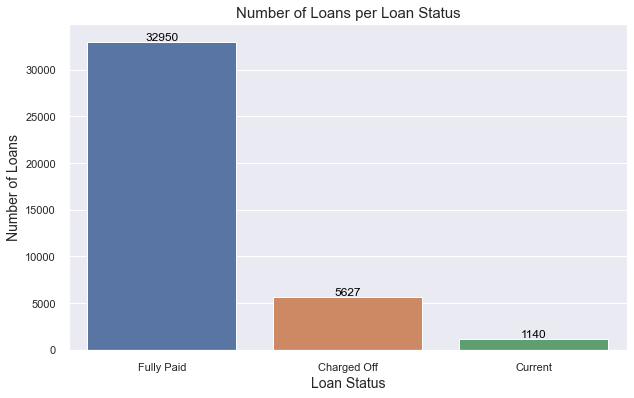

In [30]:
#Plot Distribution of Loan Status

f,ax = plt.subplots(figsize=(10,6))

sns.countplot(x="loan_status",data=loan,ax=ax)
ax.set_title('Number of Loans per Loan Status', fontsize=15)
ax.set_ylabel('Number of Loans',fontsize=14)
ax.set_xlabel('Loan Status',fontsize=14)

# ylim max value to be set
y_max = loan['loan_status'].value_counts().max() 
ax.set_ylim([0, math.ceil(y_max)+2000])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

#### As Current loan status are ongoing loans and are neither fully paid not defaulted, so we can ignore these records in further analysis

In [31]:
#Remove "Current" Records
loan=loan[~(loan.loan_status=='Current')]
loan.shape

(38577, 21)

In [32]:
#Checking Percentage of missing records
(loan.isnull().sum()/loan.shape[0])*100

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
open_acc                0.000000
pub_rec                 0.000000
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

#### As the missing percentage (%) for the remaining columns are very less so we will not drop any rows to avoid losing any information from other columns

<a id=section304></a>
## Datatype Correction

In [33]:
#Check Datatype for Loan Dataframe
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  object 
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state         

In [34]:
#Checking data for Columns which might needs Datatype Correction
loan[['issue_d','int_rate']].head()

,issue_d,int_rate
0,Dec-11,10.65%
1,Dec-11,15.27%
2,Dec-11,15.96%
3,Dec-11,13.49%
5,Dec-11,7.90%


In [35]:
#Making Corrections to Dataype
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format = "%b-%y")
loan['int_rate']= loan['int_rate'].replace("%","", regex=True).astype(float)

In [36]:
#Check the datatype after the correction
loan[['issue_d','int_rate']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   issue_d   38577 non-null  datetime64[ns]
 1   int_rate  38577 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 904.1 KB


In [37]:
#Check the sample data
loan[['issue_d','int_rate']].head()

,issue_d,int_rate
0,2011-12-01,10.65
1,2011-12-01,15.27
2,2011-12-01,15.96
3,2011-12-01,13.49
5,2011-12-01,7.90


#### The data looks good after the datatype correction

<a id=section305></a>
## Standardizing values

We will try to standardize few columns for the ease of our future analysis

#### Standardize Loan Status

In [38]:
loan.loan_status.unique()  #Check unique Loan status

array(['Fully Paid', 'Charged Off'], dtype=object)

In [39]:
#lets create new column with Default Loans to 1 and non-default loans to 0
loan['default']=loan.loan_status.map({'Charged Off':1,'Fully Paid':0})

In [40]:
loan[['loan_status','default']].head()  #Check top 5 records to confirm the mapping

,loan_status,default
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
5,Fully Paid,0


<a id=section306></a>
## Create new Features

#### Extract attributes from Loan Issue Date

In [41]:
#Extract Issue Year-Month from Issue Date
loan['issue_yr_mnth'] = loan['issue_d'].dt.to_period('M')

In [42]:
#Extract Issue Year/Month from Issue Date
loan['issue_yr'] = loan['issue_d'].dt.year
loan['issue_mnth'] = loan['issue_d'].dt.month

In [43]:
#Check sample data
loan[['issue_d','issue_yr_mnth','issue_yr','issue_mnth']].sample(5)

,issue_d,issue_yr_mnth,issue_yr,issue_mnth
9010,2011-08-01,2011-08,2011,8
4247,2011-11-01,2011-11,2011,11
14118,2011-06-01,2011-06,2011,6
11050,2011-07-01,2011-07,2011,7
24905,2010-10-01,2010-10,2010,10


#### Create Region from US States

Creating Region from US states could reduce the demographic cardinality for our analysis. Below link was used as reference to do that:
https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf

In [44]:
#Create Function to map States to Region
NE=["CT","ME","MA","NH","RI","VT","NJ","NY","PA"]
MW=["IN","IL","MI","OH","WI","IA","KS","MN","MO","NE","ND","SD"]
S=["DE","DC","FL","GA","MD","NC","SC","VA","WV","AL","KY","MS","TN","AR","LA","OK","TX"]
W=["AZ","CO","ID","NM","MT","UT","NV","WY","AK","CA","HI","OR","WA"]
def map_region(state):
    if state in NE:
        return "Northeast"
    elif state in MW:
        return "Midwest"
    elif state in S:
        return "South"
    elif state in W:
        return "West"
    else:
        return "NA"

In [45]:
#Apply Function to map State to Region
loan['region']=loan['addr_state'].apply(map_region)
loan.shape

(38577, 26)

In [46]:
loan[['addr_state','region']].sample(5)  #Check sample records

,addr_state,region
4398,NY,Northeast
13236,CA,West
15306,OH,Midwest
23791,IL,Midwest
36709,TX,South


<a id=section4></a>
# Exploratory Data Analysis

Now we proceed towards the exploratory data analysis of the the data

![title](EDA1.jpg)

<a id=section403></a>
## Feature Categorization

#### Before we start with EDA let's find and define below variable types for the ease of our analysis:
- Quntitative Variables
    - Discrete Variables
    - Continuous Variables
- Qualitative Variables
    - Ordinal Variables
    - Nominal Variables

In [47]:
#Find the number of Numerical and Categorical Columns
num_col=[x for x in loan.columns if loan[x].dtypes != 'O']
print ('Total Number of Numerical Columns: ', len(num_col))
qual_col=[x for x in loan.columns if loan[x].dtypes == 'O']
print ('Total Number of Categorical Columns: ', len(qual_col))

Total Number of Numerical Columns:  16
Total Number of Categorical Columns:  10


In [48]:
#Find Discrete Features
discrete_feature= [x for x in num_col if len(loan[x].unique())<=25]
discrete_feature

['pub_rec', 'pub_rec_bankruptcies', 'default', 'issue_yr', 'issue_mnth']

In [49]:
#Find Continuous Features
continuous_feature= [x for x in num_col if x not in discrete_feature]
continuous_feature

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'annual_inc',
 'issue_d',
 'dti',
 'open_acc',
 'total_acc',
 'issue_yr_mnth']

In [50]:
qual_col  #Check Categorical Features

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'region']

In [51]:
#Create Ordinal Variables
ordinal_feature=['term','grade','sub_grade','emp_length','verification_status','loan_status']
#Create Nominal Variables
nominal_feature= [x for x in qual_col if x not in ordinal_feature]

In [52]:
print('Ordinal Features: ',ordinal_feature)
print ('-------------------')
print('Nominal Features: ',nominal_feature)

Ordinal Features:  ['term', 'grade', 'sub_grade', 'emp_length', 'verification_status', 'loan_status']
-------------------
Nominal Features:  ['home_ownership', 'purpose', 'addr_state', 'region']


<a id=section401></a>
##  Univariate Analysis

Let's start with some Univariate Analysis

<a id=section4011></a>
###  Distribution of Loan Status

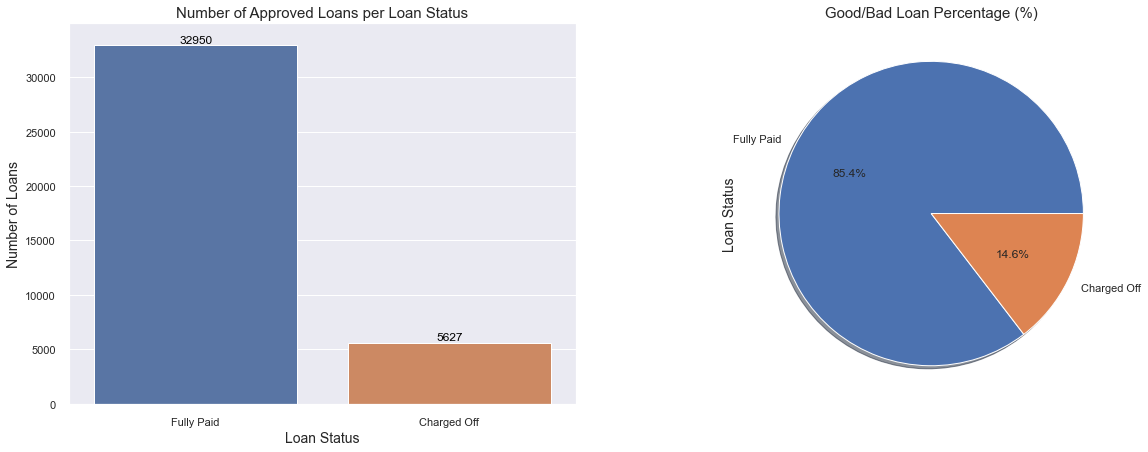

In [53]:
#Plot Distribution of Loan Status

f,ax = plt.subplots(1,2,figsize=(20,7))

sns.countplot(x="loan_status",data=loan,ax=ax[0])
ax[0].set_title('Number of Approved Loans per Loan Status', fontsize=15)
ax[0].set_ylabel('Number of Loans',fontsize=14)
ax[0].set_xlabel('Loan Status',fontsize=14)

# ylim max value to be set
y_max = loan['loan_status'].value_counts().max() 
ax[0].set_ylim([0, math.ceil(y_max)+2000])

# Iterate through the list of axes' patches
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

#Plotting Pie Chart for Fully Paid and Charged off Loan Status
loan[~(loan['loan_status']=='Current')]['loan_status'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('Good/Bad Loan Percentage (%)', fontsize=15)
ax[1].set_ylabel('Loan Status',fontsize=14)

plt.show()

- Most of the Loan applied in the dataset are __Fully Paid__ <br>
- There are `~85%` __Fully Paid__ records and `~15%` __Charged Off__ records. This means that there are `~15%` Bad loans out of all Approved Loans

<a id=section4012></a>
###  Top Purpose for Loans

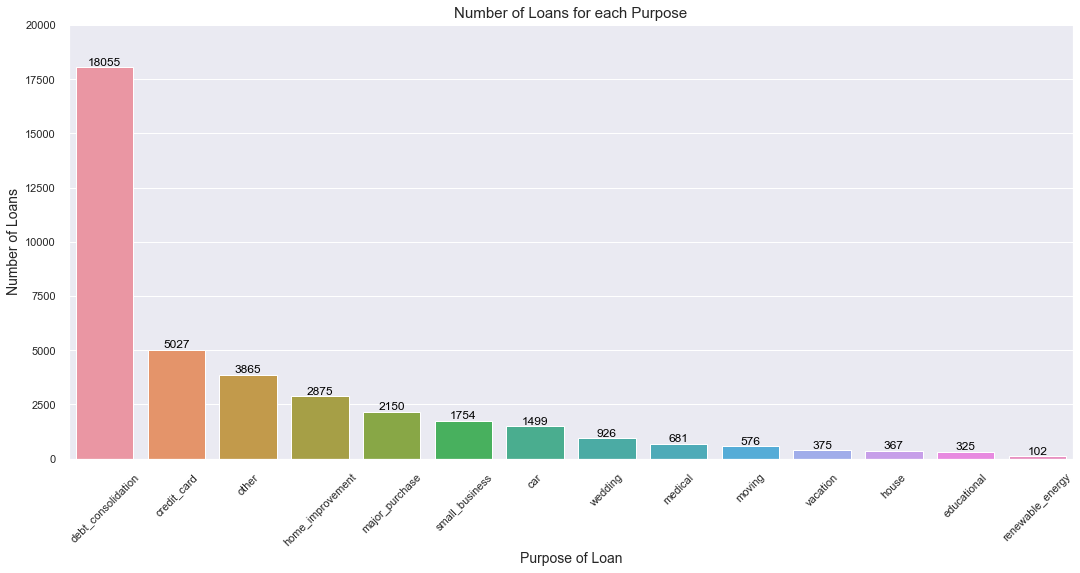

In [54]:
#Plot Distribution of Purpose of Loans
f,ax = plt.subplots(figsize=(18,8))

plot_order = loan.groupby('purpose')['id'].count().sort_values(ascending=False).index.values


sns.countplot(x="purpose",data=loan,ax=ax, order=plot_order)
plt.title('Number of Loans for each Purpose', fontsize=15)
plt.ylabel('Number of Loans',fontsize=14)
plt.xlabel('Purpose of Loan',fontsize=14)
plt.xticks(rotation=45)
# ylim max value to be set10
y_max = loan['purpose'].value_counts().max() 
ax.set_ylim([0, math.ceil(y_max)+2000])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

####  Top 5 Loan Purpose are 
    - Debt Consolidation
    - Credit Card
    - Other
    - Home Improvement
    - Major Purchase

<a id=section4013></a>
###  Frequency of Approved Loans from 2007 to 2011

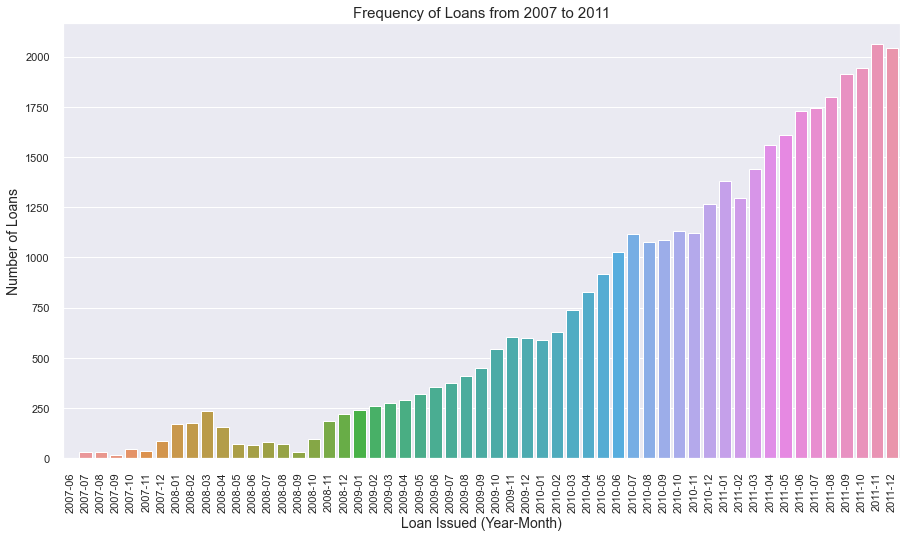

In [55]:
#Plot Distribution of Frequency of Loans from 2007-2011

f,ax = plt.subplots(figsize=(15,8))

sns.countplot(loan['issue_yr_mnth'].sort_values())
plt.title('Frequency of Loans from 2007 to 2011', fontsize=15)
plt.ylabel('Number of Loans',fontsize=14)
plt.xlabel('Loan Issued (Year-Month)',fontsize=14)
plt.xticks(rotation=90)

plt.show()

#### The plot shows a steady increase in Approved Loan applications over the year 2007-2011
#### However, we also notice a fall in Approved Loans from April 2008 till Septemeber 2008. It could be because of the global recession which happened in 2008 and people could have been hesistant to apply for loans or more number of loans could have been rejected because of the risk factor caused by recession and jobs impact.

<a id=section4014></a>
###  Analyzing Amount and Interest Rates

In [56]:
loan.columns #Check Columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'open_acc', 'pub_rec', 'total_acc',
       'pub_rec_bankruptcies', 'default', 'issue_yr_mnth', 'issue_yr',
       'issue_mnth', 'region'],
      dtype='object')

#### We will analyse the below amount in the dataset:
    - Loan Amount: It is the amount applied by potential borrowers
    - Funded Amount: It is the amount recommended/approved by Lending Club
    - Funded Amount by Investor: It is the amount funded by investors

In [57]:
loan[['loan_amnt','funded_amnt','funded_amnt_inv']].describe() #Check Describe for Amount

,loan_amnt,funded_amnt,funded_amnt_inv
count,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123
std,7348.441646,7090.306027,7022.720644
min,500.000000,500.000000,0.000000
25%,5300.000000,5200.000000,5000.000000
50%,9600.000000,9550.000000,8733.440000
75%,15000.000000,15000.000000,14000.000000
max,35000.000000,35000.000000,35000.000000


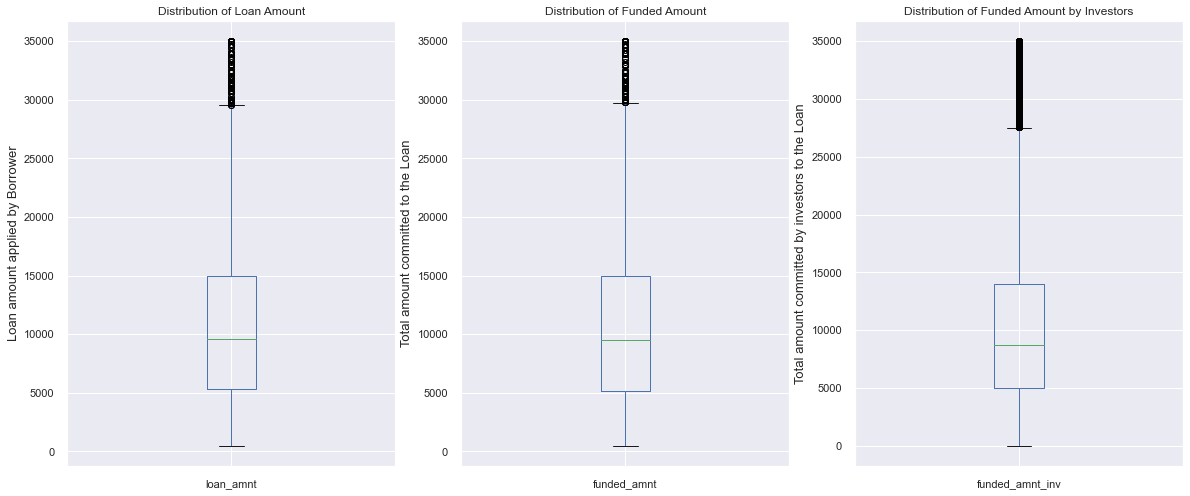

In [58]:
#plotting distribution plots for Amount Fields
plt.figure(figsize=(20, 18))
plt.subplot(2,3,1)
#Plotting Box plot for Loan Amount
loan.loan_amnt.plot.box()
plt.ylabel('Loan amount applied by Borrower',fontsize=13)
plt.title('Distribution of Loan Amount')
plt.subplot(2,3,2)
#Plotting Box plot for Funded Amount
loan.funded_amnt.plot.box()
plt.ylabel('Total amount committed to the Loan',fontsize=13)
plt.title('Distribution of Funded Amount')
plt.subplot(2,3,3)
#Plotting Box plot for Funded Amount by Investor
loan.funded_amnt_inv.plot.box()
plt.ylabel('Total amount committed by investors to the Loan',fontsize=13)
plt.title('Distribution of Funded Amount by Investors')
plt.show()

- __Average Loan amount asked by borrowers is equal to 9600__ <br>
- __Average Loan amount committed by Lending Club is 9550__ <br>
- __Average Loan amount funded by investors is less than the average Loan amount committed by Lending Club__

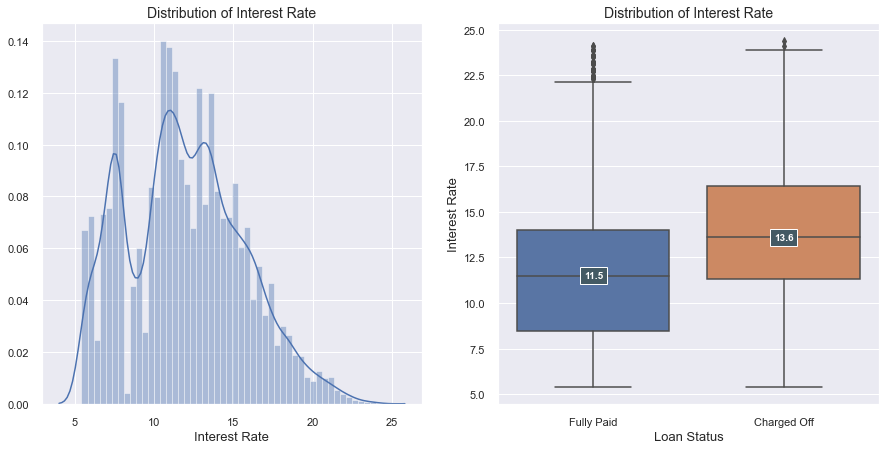

In [59]:
#plotting distribution plots for Interest Rates
f,ax = plt.subplots(1,2,figsize=(15,7))

sns.distplot(loan.int_rate, ax=ax[0])
ax[0].set_title('Distribution of Interest Rate',fontsize=14)
ax[0].set_xlabel('Interest Rate',fontsize=13)


sns.boxplot(y=loan.int_rate,x=loan.loan_status, ax=ax[1])
ax[1].set_title('Distribution of Interest Rate',fontsize=14)
ax[1].set_xlabel('Loan Status',fontsize=13)
ax[1].set_ylabel('Interest Rate',fontsize=13)
lines = ax[1].get_lines()
categories = ax[1].get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax[1].text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

plt.show()

#### The median interest rate is __`11.5%`__ for "Fully Paid" Loans.
#### The median interest rate is __`13.6%`__ for "Charged Off" Loans.

#### Create Interest Rate Category Bucket

In [60]:
#Create bucket of Interest Rate
# High Interest Rate (>15.0%)
# Medium Interest Rate (>=10.0% and <=15.0%)
# Low Interest Rate (<10.0%)
loan['int_rate_catg']=loan.int_rate.apply(lambda x: 'Greater than 15%' if x>15.0 
                                                      else ('10%-15%' if (x>=10.0 and x<=15.0) else 'Less than 10%'))

In [61]:
loan[['int_rate','int_rate_catg']].sample(5)  #Check sample Records

,int_rate,int_rate_catg
6660,10.65,10%-15%
35900,8.00,Less than 10%
35456,12.53,10%-15%
21230,15.95,Greater than 15%
19758,6.92,Less than 10%


<a id=section4015></a>
### Analyzing Annual Income of Loan Applicants

In [62]:
loan.annual_inc.describe([0.25,0.5,0.75,0.9,1]) #Check describe for annual Income 

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
90%      1.150000e+05
100%     6.000000e+06
max      6.000000e+06
Name: annual_inc, dtype: float64

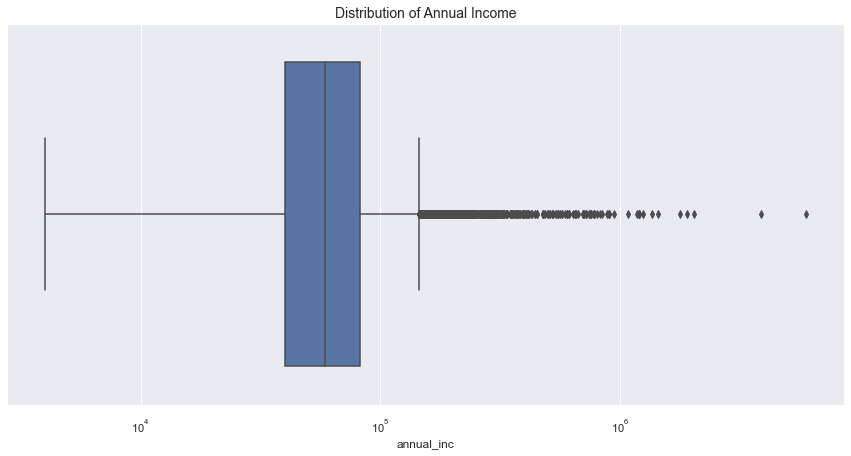

In [63]:
#Plotting distribution plots for Annual Income
f,ax = plt.subplots(figsize=(15,7))

sns.boxplot(loan.annual_inc, ax=ax)
ax.set_title('Distribution of Annual Income',fontsize=14)
ax.set_xscale('log')  #Applying Log scale to X-Axis
plt.show()

The median annual income is around `~60K` and there also seems to be outliers in the data which clearly tell us that we have very high annual income ranges. Based on the above information we can create multiple income range buckets:
- Low Income Category (<=60K)
- Medium Income Category (>60K and <=120K)
- High Income Cateogry (>120K)

#### Create Annual Income Category Bucket

In [64]:
#Create bucket of Annual Income Category
# High Income (>120K)
# Medium income (>60K and <=120K)
# Low Income (<=60K)
loan['annual_inc_catg']=loan.annual_inc.apply(lambda x: 'High Income' if x>120000.0 
                                                      else ('Medium Income' if (x>60000.0 and x<=120000.0) else 'Low income'))



In [65]:
loan[['annual_inc','annual_inc_catg']].sample(5)  #Check the sample data

,annual_inc,annual_inc_catg
8710,38400.0,Low income
28030,16800.0,Low income
35887,26400.0,Low income
2012,31500.0,Low income
22668,80000.0,Medium Income


<a id=section4016></a>
### Analyzing Employment Length of Loan Applicants

In [66]:
#Check unique values for employee Length
loan.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [67]:
loan.emp_length.value_counts() #Check value counts 

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [68]:
#Check missing values in emp_length
loan.emp_length.isnull().sum()

1033

#### Imputing any can make the analysis biased so we will just replace with missing values with ___"Missing"___ Label for now

In [69]:
#Replace missing values with new label "MISSING" 
loan['emp_length']=loan['emp_length'].fillna('MISSING')

In [70]:
loan.emp_length.value_counts() #Check value counts again

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
MISSING      1033
Name: emp_length, dtype: int64

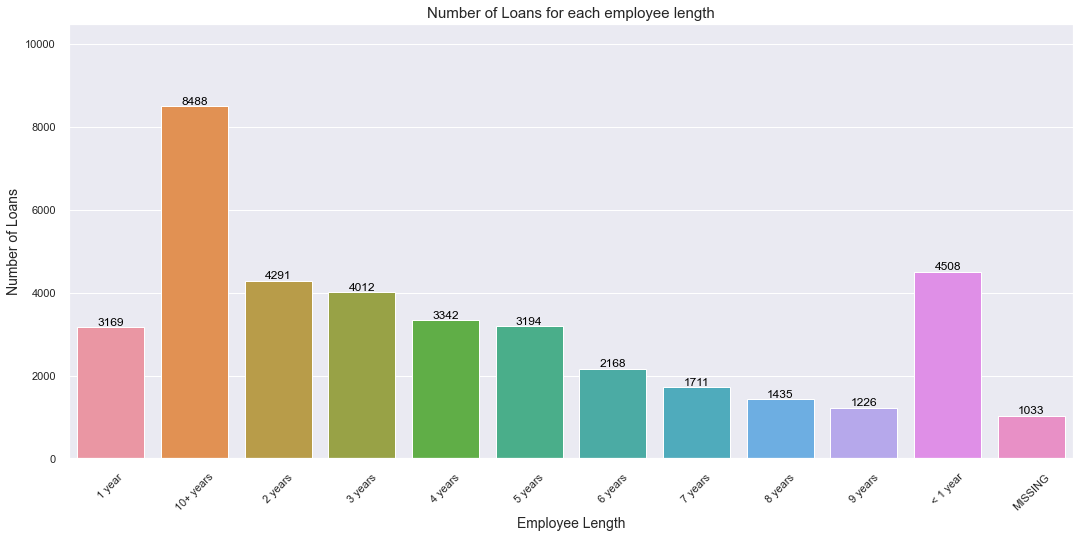

In [71]:
#Plot Distribution of Emp
f,ax = plt.subplots(figsize=(18,8))

sns.countplot(x="emp_length",data=loan,ax=ax,order=sorted(loan['emp_length'].unique()))
plt.title('Number of Loans for each employee length', fontsize=15)
plt.ylabel('Number of Loans',fontsize=14)
plt.xlabel('Employee Length',fontsize=14)
plt.xticks(rotation=45)
# ylim max value to be set10
y_max = loan['emp_length'].value_counts().max() 
ax.set_ylim([0, math.ceil(y_max)+2000])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

It looks like more number of loan applicants are having greater than equal to `10` years of experience

#### Create Employment Length Category Bucket

In [72]:
#Create Employee Length Groups
# High Experience (10+ Years)
# Medium Experience (Between 5years - 10 years)
# Low Experience (Less than 5 years)
loan['emp_length_catg']=loan.emp_length.map({'10+ years':'High','< 1 year':'Low', '3 years':'Low', '8 years':'Medium',
                                             '9 years':'Medium','4 years':'Low', '5 years':'Medium', '1 year':'Low',
                                             '6 years':'Medium', '2 years':'Low', '7 years':'Medium','MISSING':'MISSING'})


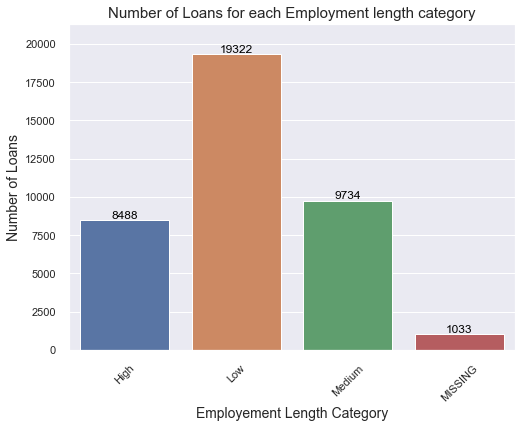

In [73]:
#Plot Distribution of Employee Length Category
f,ax = plt.subplots(figsize=(8,6))

sns.countplot(x="emp_length_catg",data=loan,ax=ax)
plt.title('Number of Loans for each Employment length category', fontsize=15)
plt.ylabel('Number of Loans',fontsize=14)
plt.xlabel('Employement Length Category',fontsize=14)
plt.xticks(rotation=45)
# ylim max value to be set10
y_max = loan['emp_length_catg'].value_counts().max() 
ax.set_ylim([0, math.ceil(y_max)+2000])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

- Looks like maximum number of Approved loans are for people under Low Employment length ___(Less than 5 years)___ Category

<a id=section4017></a>
### Analyzing dti Rate of Loan Applicants

Debt-to-income `(dti)` is an important metric since it says approximately the level of debt of each individual consumer with respect to its total income.

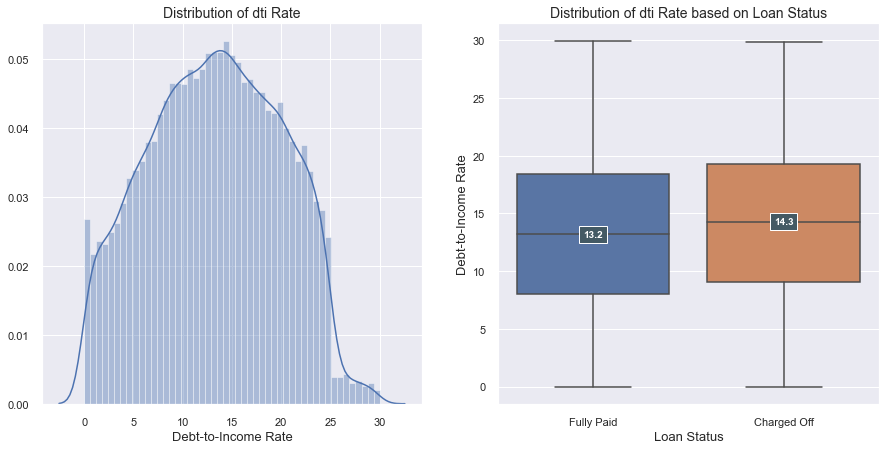

In [74]:
#plotting distribution plots for Interest Rates
f,ax = plt.subplots(1,2,figsize=(15,7))

sns.distplot(loan.dti, ax=ax[0])
ax[0].set_title('Distribution of dti Rate',fontsize=14)
ax[0].set_xlabel('Debt-to-Income Rate',fontsize=13)


sns.boxplot(y=loan.dti,x=loan.loan_status, ax=ax[1])
ax[1].set_title('Distribution of dti Rate based on Loan Status',fontsize=14)
ax[1].set_xlabel('Loan Status',fontsize=13)
ax[1].set_ylabel('Debt-to-Income Rate',fontsize=13)
lines = ax[1].get_lines()
categories = ax[1].get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax[1].text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

plt.show()

#### It is observed that dti rate is just slighlty higher for "Charged Off" Status

#### Create Debt-to-Income Rate Category Bucket

In [75]:
#Create bucket of dti Rate
# High dti Rate (>18.0%)
# Medium Interest Rate (>=10.0% and <=18.0%)
# Low Interest Rate (<10.0%)
loan['dti_rate_catg']=loan.dti.apply(lambda x: 'Greater than 18%' if x>18.0 
                                                      else ('10%-18%' if (x>=10.0 and x<=18.0) else 'Less than 10%'))

In [76]:
loan[['dti','dti_rate_catg']].sample(5)  #Check sample Records

,dti,dti_rate_catg
428,7.98,Less than 10%
9683,23.27,Greater than 18%
28764,0.70,Less than 10%
7128,25.36,Greater than 18%
9176,8.32,Less than 10%


<a id=section4018></a>
### Analysis on Open Account over Loan Status

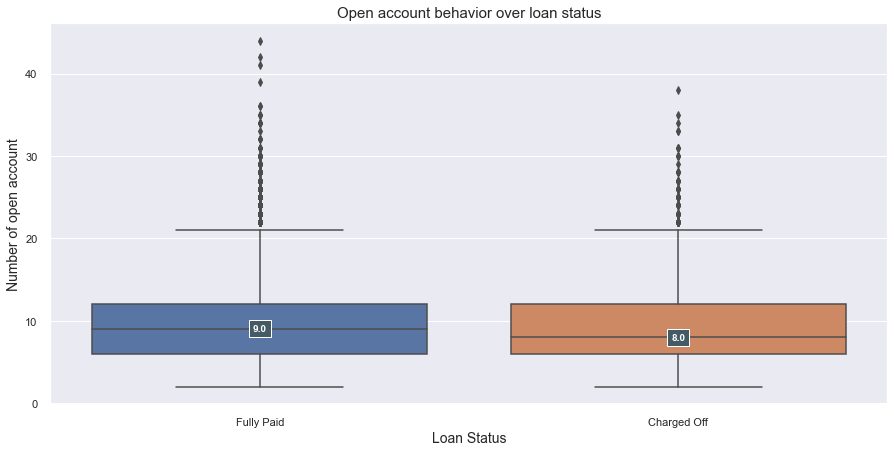

In [77]:
#Plot Open Account behavior over Loan Status
f,ax = plt.subplots(figsize=(15,7))

sns.boxplot( x= loan['loan_status'], y=loan['open_acc'],ax=ax)



plt.title('Open account behavior over loan status',fontsize=15)
plt.ylabel('Number of open account',fontsize=14)
plt.xlabel('Loan Status',fontsize=14)


lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

plt.show()

#### Even though the average open account is higher for fully paid, but the difference is insignificant. `So it can be ignored.`

<a id=section4019></a>
### Analysis on Total Account over Loan Status

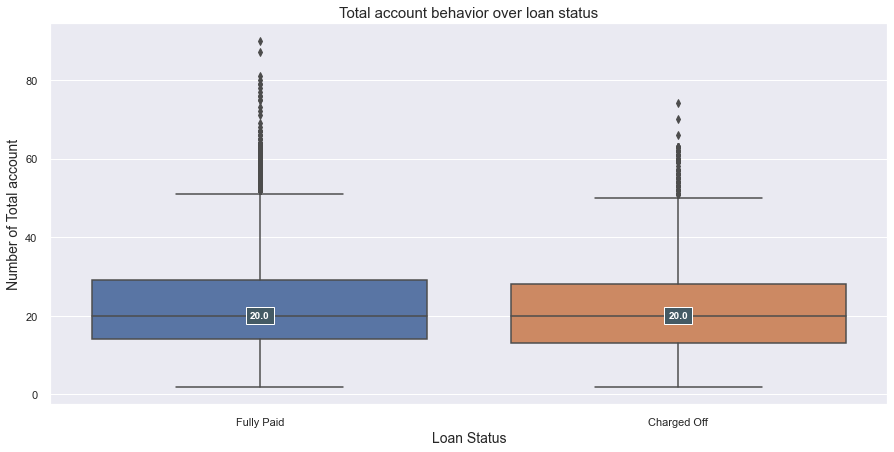

In [78]:
#Plot Total Account behavior over Loan Status
f,ax = plt.subplots(figsize=(15,7))

sns.boxplot( x= loan['loan_status'], y=loan['total_acc'],ax=ax)


plt.title('Total account behavior over loan status',fontsize=15)
plt.ylabel('Number of Total account',fontsize=14)
plt.xlabel('Loan Status',fontsize=14)


lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))


plt.show()

#### Average total open account has no difference over the status. `So it can be ignored.`



<a id=section402></a>
##  Bivariate/Multivariate Analysis

It's time to do more deeper analysis by using Bivariate and Multivariate Analysis

<a id=section4021></a>
### Analysis on Region

In order to do the analysis for Loans Issues by Region, we need to map the US states to Region. Below link was used as reference to do that:
https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf


In [79]:
#Check the region wise Approved Loan count
loan.region.value_counts()

South        12627
West         11144
Northeast     9395
Midwest       5411
Name: region, dtype: int64

In [80]:
#create new dataframe group by Region and Loan Status
Loan_RS=pd.DataFrame(loan.groupby(['region','loan_status']).agg({'id':'count','loan_amnt':'sum'}))
Loan_RS.reset_index(inplace=True)
Loan_RS['loan_amnt']=Loan_RS['loan_amnt']/1000 #Convert amount to Millions
Loan_RS.head()

,region,loan_status,id,loan_amnt
0,Midwest,Charged Off,759,9061.250
1,Midwest,Fully Paid,4652,49823.425
2,Northeast,Charged Off,1262,15331.750
3,Northeast,Fully Paid,8133,88933.375
4,South,Charged Off,1825,21964.950


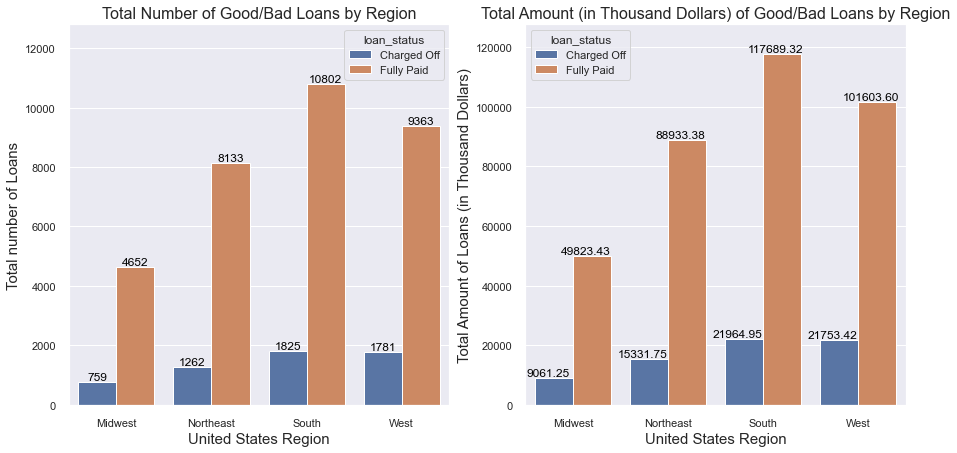

In [81]:
#Plot graph for Count of GOOD/BAD Approved Loans based on Region 

fig, ax = plt.subplots(1,2,figsize=(15,7))
sns.barplot('region','id',hue='loan_status',data=Loan_RS,ax=ax[0])
ax[0].set_ylabel('Total number of Loans',fontsize=15)
ax[0].set_xlabel('United States Region',fontsize=15)
ax[0].set_title('Total Number of Good/Bad Loans by Region',fontsize=16)
# ylim max value to be set
y_max = Loan_RS['id'].max() 
ax[0].set_ylim([0, math.ceil(y_max)+2000])

# Iterate through the list of axes' patches
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
#Plot graph for Total amount of GOOD/BAD Approved Loans based on Region 
sns.barplot('region','loan_amnt',hue='loan_status',data=Loan_RS,ax=ax[1])
ax[1].set_ylabel('Total Amount of Loans (in Thousand Dollars)',fontsize=15)
ax[1].set_xlabel('United States Region',fontsize=15)
ax[1].set_title('Total Amount (in Thousand Dollars) of Good/Bad Loans by Region',fontsize=16)
# ylim max value to be set
y_max = Loan_RS['loan_amnt'].max() 
ax[1].set_ylim([0, math.ceil(y_max)+10000])

# Iterate through the list of axes' patches
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/3., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

#### Based on the plot above we can conclude that the West region is having a higher number of "Charged Off" status based on Loan count and Loan Amount in comparison with other Region in US

#### The above plot doesn't give us the exact reasons why a loan is categorized as a bad loan (other variables that might have influence the condition of the loan) but it give us a deeper insight on the level of risk in a particular region.

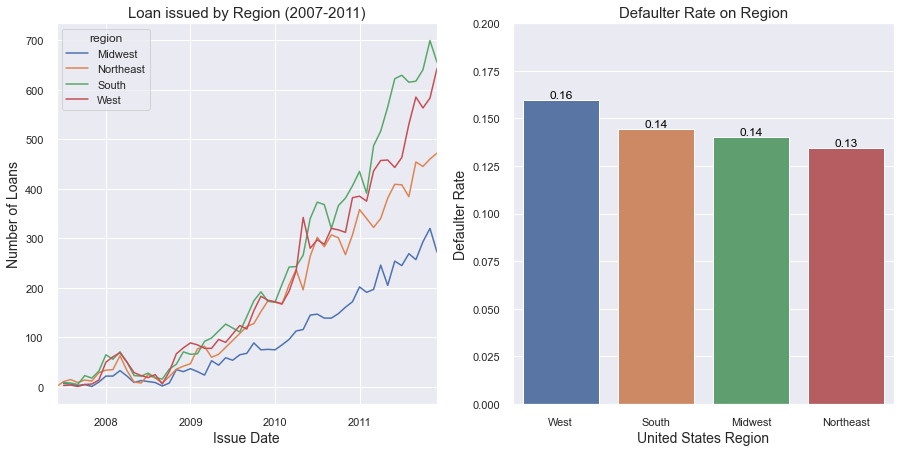

In [82]:
#Plot Distribution of Approved loan by Region
fig, ax = plt.subplots(1,2,figsize=(15,7))
# use unstack()
loan.groupby(['issue_yr_mnth','region']).count()['id'].unstack().plot(ax=ax[0])
ax[0].set_title('Loan issued by Region (2007-2011)', fontsize=15)
ax[0].set_ylabel('Number of Loans',fontsize=14)
ax[0].set_xlabel('Issue Date',fontsize=14)

#Plotting Defaulter Rate on Region
sns.barplot(x='region',y='default',data=loan,ax=ax[1],ci=None)
ax[1].set_title('Defaulter Rate on Region', fontsize=15)
ax[1].set_ylabel('Defaulter Rate',fontsize=14)
ax[1].set_xlabel('United States Region',fontsize=14)

# ylim max value to be set
y_max = 0.40
ax[1].set_ylim([0, math.floor(y_max)+ 0.2])

# Iterate through the list of axes' patches
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

All the US Regions has an increasing trend in the number of Approved Loans, but based on comparison we see __more number of Defaulters__ in __`West`__ Region.

<a id=section4022></a>
### Analysis on Interest Rate

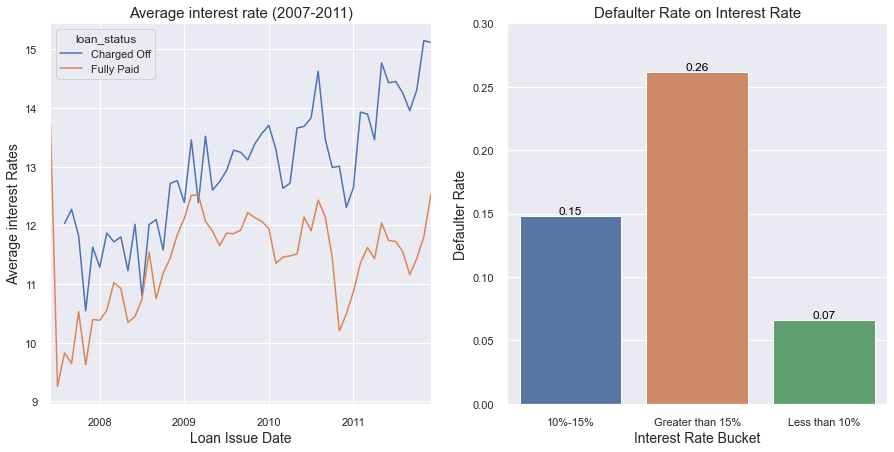

In [83]:
#Plot average interest rate over time for GOOD/BAD Loans
# plot subplots
fig, ax = plt.subplots(1,2,figsize=(15,7))
# use unstack()
loan.groupby(['issue_yr_mnth','loan_status']).mean()['int_rate'].unstack().plot(ax=ax[0])
ax[0].set_title('Average interest rate (2007-2011)', fontsize=15)
ax[0].set_ylabel('Average interest Rates',fontsize=14)
ax[0].set_xlabel('Loan Issue Date',fontsize=14)

#Plotting Defaulter Rate on Interest Rate
sns.barplot(x='int_rate_catg',y='default',data=loan,ax=ax[1],ci=None)
ax[1].set_title('Defaulter Rate on Interest Rate', fontsize=15)
ax[1].set_ylabel('Defaulter Rate',fontsize=14)
ax[1].set_xlabel('Interest Rate Bucket',fontsize=14)

# ylim max value to be set
y_max = 0.40
ax[1].set_ylim([0, math.floor(y_max)+ 0.3])

# Iterate through the list of axes' patches
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

#### We can clearly see Interest Rates over time are  `higher` for "Charged Off" loan status in comparison with "Fully Paid" Loan Status
#### It is observed that Defaulters were issued loan with a higher interest rate i.e. `"13"` and above.
__Defaulter Rate for Interest Rate Bucket also varies significantly among different Interest Rate buckets.__

<a id=section4023></a>
### Analysis on Interest Rate over Region

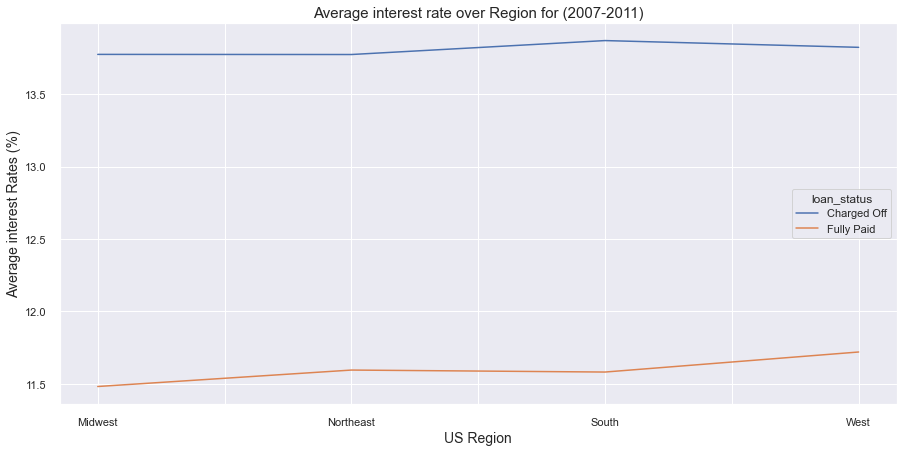

In [84]:
#Plot Distribution of loan by Region
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
loan.groupby(['region','loan_status']).mean()['int_rate'].unstack().plot(ax=ax)
ax.set_title('Average interest rate over Region for (2007-2011)', fontsize=15)
ax.set_ylabel('Average interest Rates (%)',fontsize=14)
ax.set_xlabel('US Region',fontsize=14)
plt.show()

#### Interest Rates for Charged off/Fully Paid loan status across Region does not vary much.


<a id=section4024></a>
### Analysis on Interest Rate with Grades

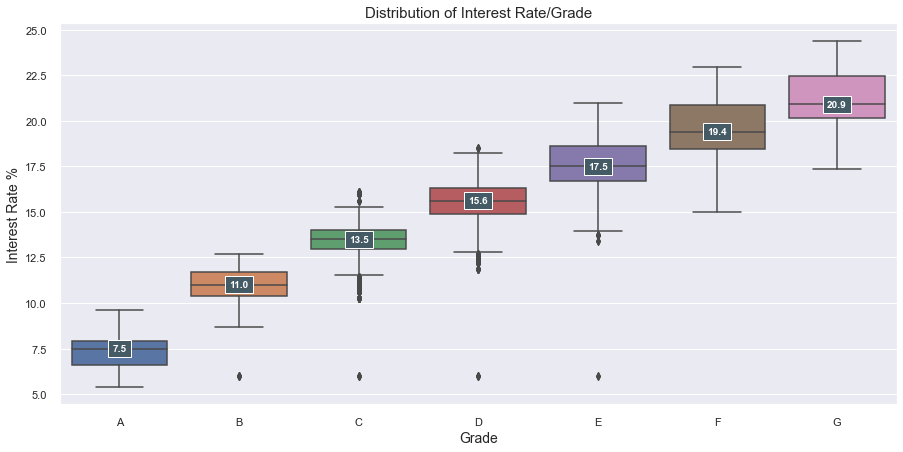

In [85]:
#Plot distribution of Interest Rate based on Grades
f,ax = plt.subplots(figsize=(15,7))

sns.boxplot( x=loan["grade"], y=loan["int_rate"],order=sorted(loan['grade'].unique()),ax=ax)

plt.title('Distribution of Interest Rate/Grade', fontsize=15)
plt.ylabel('Interest Rate %',fontsize=14)
plt.xlabel('Grade',fontsize=14)


lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))


plt.show()



#### Interest Rates increases as the Grade goes down



<a id=section4025></a>
### Analysis on Annual Income Category

In [86]:
#Check average Interest rate based on annual income category and loan status
loan.groupby(['annual_inc_catg','loan_status'])['int_rate'].mean()   


annual_inc_catg  loan_status
High Income      Charged Off    15.136609
                 Fully Paid     12.345754
Low income       Charged Off    13.391563
                 Fully Paid     11.422176
Medium Income    Charged Off    14.395436
                 Fully Paid     11.705680
Name: int_rate, dtype: float64

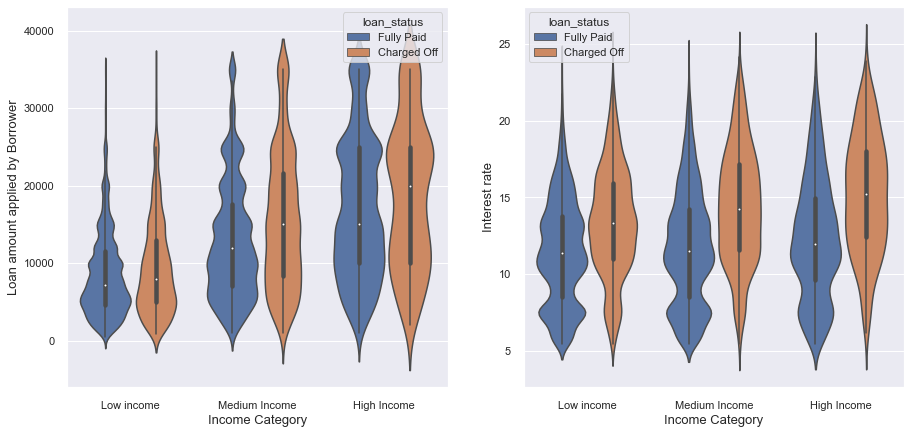

In [87]:
#plotting Annual income category with Loan amount and Interest Rate
fig, ax = plt.subplots(1,2,figsize=(15, 7))
sns.violinplot(x='annual_inc_catg',y='loan_amnt',hue='loan_status',data=loan,ax=ax[0])
ax[0].set_ylabel('Loan amount applied by Borrower',fontsize=13)
ax[0].set_xlabel('Income Category',fontsize=13)


#plt.title('Income Category ')
sns.violinplot(x='annual_inc_catg',y='int_rate',hue='loan_status',data=loan,ax=ax[1])
ax[1].set_ylabel('Interest rate',fontsize=13)
ax[1].set_xlabel('Income Category',fontsize=13)
plt.show()

#### Borrowers that made part of the high income category took higher loan amounts than people from low and medium income categories

#### Borrowers who have "charged off" status have taken higher loan amount on a higher interest rate across income category than borrowers who have "Fully Paid" Status

In [88]:
## Create a pivot table for loan_Status and Annual Income Category with the values set to number of loan applications
stack=pd.pivot_table(data=loan,index='annual_inc_catg',values='id',columns='loan_status',aggfunc='count')
stack

loan_status,Charged Off,Fully Paid
annual_inc_catg,,
High Income,348,2805
Low income,3480,17481
Medium Income,1799,12664


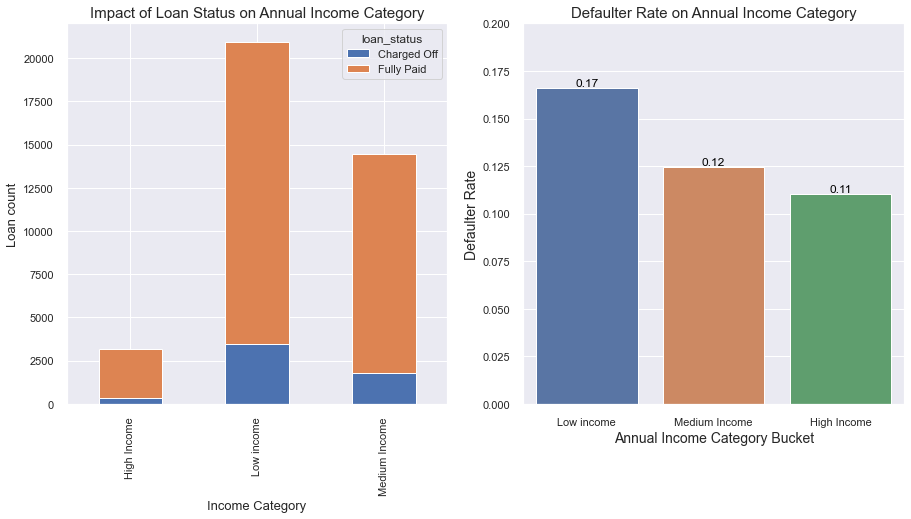

In [89]:
fig, ax = plt.subplots(1,2,figsize=(15, 7))


##Plot the stacked bar chart.
stack.plot(kind='bar',stacked=True,ax=ax[0])
ax[0].set_xlabel('Income Category',fontsize=13)
ax[0].set_ylabel('Loan count',fontsize=13)
ax[0].set_title('Impact of Loan Status on Annual Income Category',fontsize=15)

#Plotting Defaulter Rate on Annual Income Category
sns.barplot(x='annual_inc_catg',y='default',data=loan,ax=ax[1],ci=None)
ax[1].set_title('Defaulter Rate on Annual Income Category', fontsize=15)
ax[1].set_ylabel('Defaulter Rate',fontsize=14)
ax[1].set_xlabel('Annual Income Category Bucket',fontsize=14)


# ylim max value to be set
y_max = 0.40
ax[1].set_ylim([0, math.floor(y_max)+ 0.2])

# Iterate through the list of axes' patches
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

       
plt.show()


#### Loans that were borrowed by the Low income category had a slightly higher chance of becoming a bad loan. 

<a id=section4026></a>
### Analysis on Grade and Sub-Grade

Lending Club assigned `grade` are based on credit scores. Credit scores are important metrics for assesing the overall level of risk.The lower the grade of the credit score, the higher the risk for investors.

In [90]:
## Create a pivot table for loan_Status and grade/sub-grade with the values set to number of loan applications
grade=pd.pivot_table(data=loan,index='grade',values='id',columns='loan_status',aggfunc='count')
sub_grade=pd.pivot_table(data=loan,index='sub_grade',values='id',columns='loan_status',aggfunc='count')


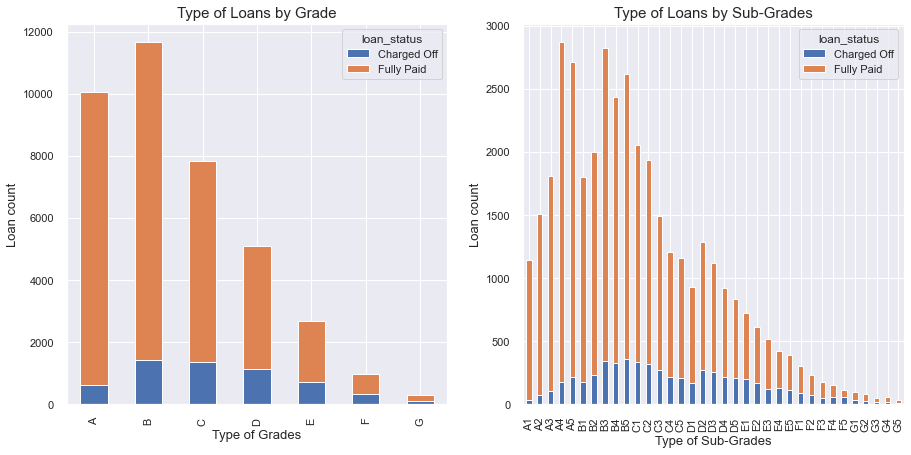

In [91]:
#plotting type of Loans by Grade and Sub-Grade
fig, ax = plt.subplots(1,2,figsize=(15, 7))
grade.plot(kind='bar',stacked=True,ax=ax[0])
#sns.violinplot(x='annual_inc_catg',y='loan_amnt',hue='loan_status',data=loan_new,ax=ax[0])
ax[0].set_ylabel('Loan count',fontsize=13)
ax[0].set_xlabel('Type of Grades',fontsize=13)
ax[0].set_title('Type of Loans by Grade', fontsize=15)
#plt.title('Distribution of Loan Amount')

sub_grade.plot(kind='bar',stacked=True,ax=ax[1])
ax[1].set_ylabel('Loan count',fontsize=13)
ax[1].set_xlabel('Type of Sub-Grades',fontsize=13)
ax[1].set_title('Type of Loans by Sub-Grades', fontsize=15)
plt.show()


#### Based on the plots, It looks like Customers with a grade of "B" and "C" have more number of Charged Off status

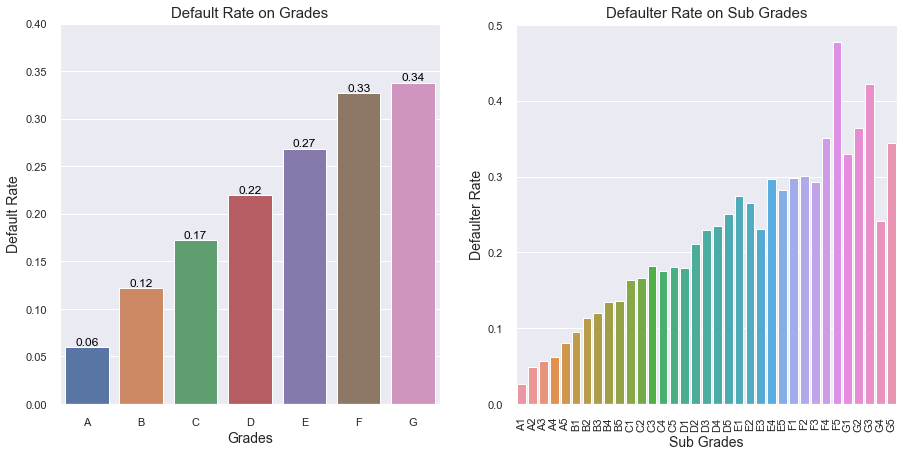

In [92]:
#Plotting Default Rate on Grades
fig, ax = plt.subplots(1,2,figsize=(15, 7))


sns.barplot(x='grade',y='default',data=loan,ax=ax[0],ci=None,order=sorted(loan['grade'].unique()))
ax[0].set_title('Default Rate on Grades', fontsize=15)
ax[0].set_ylabel('Default Rate',fontsize=14)
ax[0].set_xlabel('Grades',fontsize=14)


# ylim max value to be set
y_max = 0.8
ax[0].set_ylim([0, math.floor(y_max)+ 0.4])

# Iterate through the list of axes' patches
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

#Plotting Defaulter Rate on Sub Grade
sns.barplot(x='sub_grade',y='default',data=loan,ax=ax[1],ci=None,order=sorted(loan['sub_grade'].unique()))
ax[1].set_title('Defaulter Rate on Sub Grades', fontsize=15)
ax[1].set_ylabel('Defaulter Rate',fontsize=14)
ax[1].set_xlabel('Sub Grades',fontsize=14)
xlabels = ax[1].get_xticklabels()
ax[1].set_xticklabels(xlabels, rotation=90,)


       
plt.show()

#### This confirms that the scores that has a lower grade are at a higher level of risk

<a id=section4027></a>
### Analysis on Debt-to-Income Rate

Debt-to-income `(dti)` is an important metric since it says approximately the level of debt of each individual consumer with respect to its total income.

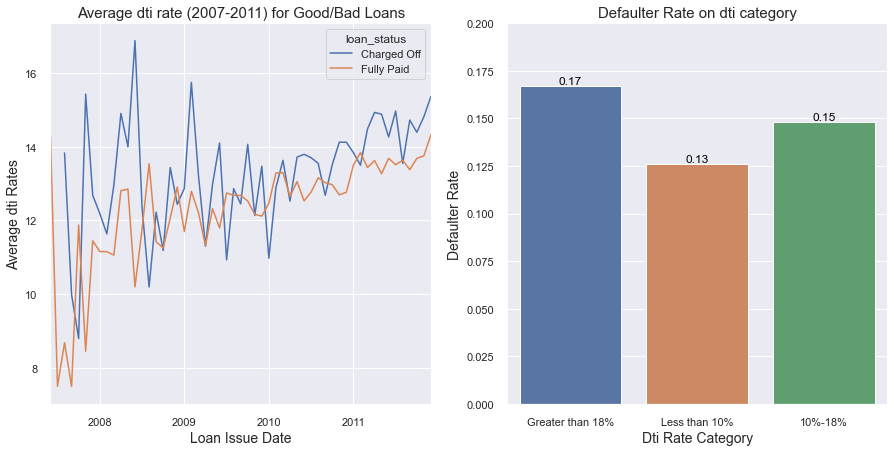

In [93]:
#Plot average dti rate over time for GOOD/BAD Loans
# plot data
fig, ax = plt.subplots(1,2,figsize=(15,7))
# use unstack()
loan.groupby(['issue_yr_mnth','loan_status']).mean()['dti'].unstack().plot(ax=ax[0])
ax[0].set_title('Average dti rate (2007-2011) for Good/Bad Loans', fontsize=15)
ax[0].set_ylabel('Average dti Rates',fontsize=14)
ax[0].set_xlabel('Loan Issue Date',fontsize=14)

#Plotting Defaulter Rate on dti rate category
sns.barplot(x='dti_rate_catg',y='default',data=loan,ax=ax[1],ci=None)
ax[1].set_title('Defaulter Rate on dti category', fontsize=15)
ax[1].set_ylabel('Defaulter Rate',fontsize=14)
ax[1].set_xlabel('Dti Rate Category',fontsize=14)

# ylim max value to be set
y_max = 0.40
ax[1].set_ylim([0, math.floor(y_max)+ 0.2])

# Iterate through the list of axes' patches
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

 #### High Debt-to-income rate for "Charged off" loan status confirms increase risk factor for Lending Club
 #### Based on the plot, dti rate  above `"14"` looks a certain risk for the Lending Club

<a id=section4028></a>
### Analysis on Verification Status

Verification Status indicates if income was verified by LC, not verified, or if the income source was verified

In [94]:
## Create a pivot table for loan_Status and verification status with the values set to number of loan applications
verification=pd.pivot_table(data=loan,index='verification_status',values='id',columns='loan_status',aggfunc='count')


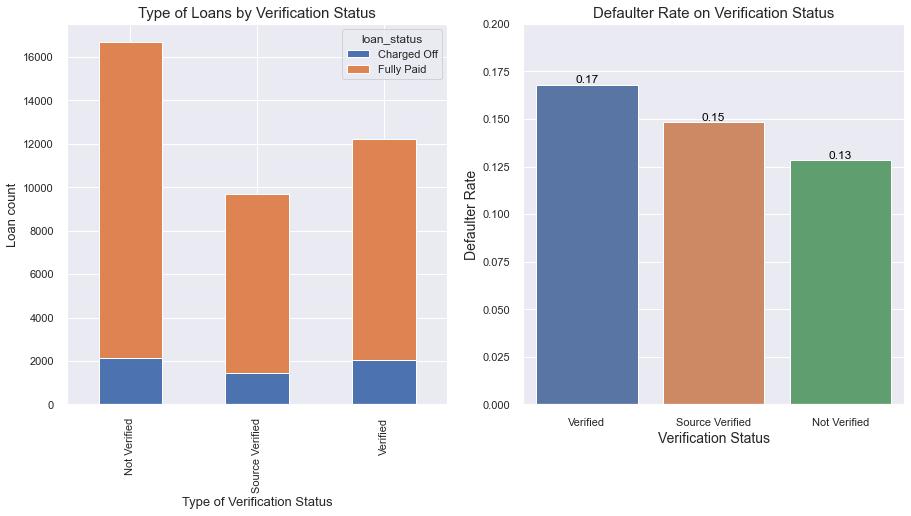

In [95]:
#plotting type of Loans by Verification Status
fig, ax = plt.subplots(1,2,figsize=(15, 7))
verification.plot(kind='bar',stacked=True,ax=ax[0])
ax[0].set_ylabel('Loan count',fontsize=13)
ax[0].set_xlabel('Type of Verification Status',fontsize=13)
ax[0].set_title('Type of Loans by Verification Status', fontsize=15)

#Plotting Defaulter Rate on Verification Status
sns.barplot(x='verification_status',y='default',data=loan,ax=ax[1],ci=None)
ax[1].set_title('Defaulter Rate on Verification Status', fontsize=15)
ax[1].set_ylabel('Defaulter Rate',fontsize=14)
ax[1].set_xlabel('Verification Status',fontsize=14)

# ylim max value to be set
y_max = 0.40
ax[1].set_ylim([0, math.floor(y_max)+ 0.2])

# Iterate through the list of axes' patches
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

#### Default rate is the highest for "Verified" and lowest for "Not Verified" which does not make sense and could not be used as one the driving factors for identifying Risk.

<a id=section4029></a>
### Analysis on Term

`Term` is number of payments on the loan. Values are in months and can be either 36 or 60.

In [96]:
## Create a pivot table for loan_Status and term with the values set to number of loan applications
term=pd.pivot_table(data=loan,index='term',values='id',columns='loan_status',aggfunc='count')


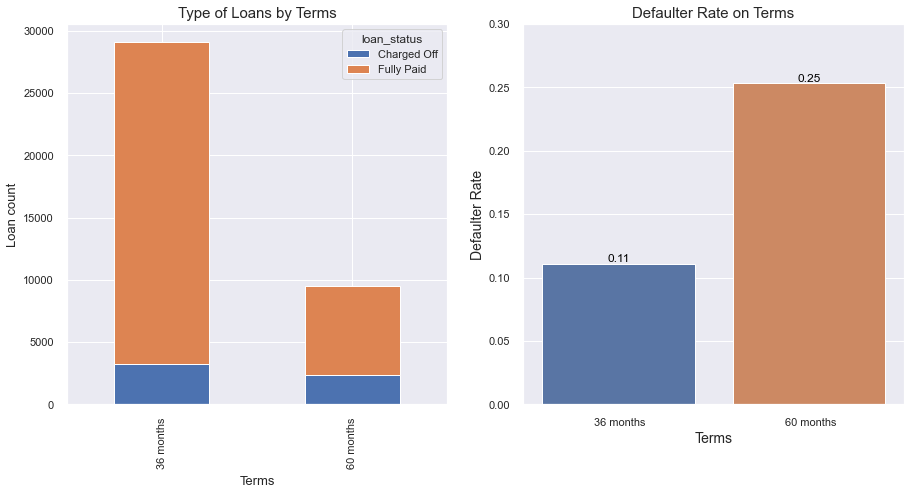

In [97]:
#plotting type of Loans by Term
fig, ax = plt.subplots(1,2,figsize=(15, 7))
term.plot(kind='bar',stacked=True,ax=ax[0])
ax[0].set_ylabel('Loan count',fontsize=13)
ax[0].set_xlabel('Terms',fontsize=13)
ax[0].set_title('Type of Loans by Terms', fontsize=15)

#Plotting Defaulter Rate on Term
sns.barplot(x='term',y='default',data=loan,ax=ax[1],ci=None)
ax[1].set_title('Defaulter Rate on Terms', fontsize=15)
ax[1].set_ylabel('Defaulter Rate',fontsize=14)
ax[1].set_xlabel('Terms',fontsize=14)

# ylim max value to be set
y_max = 0.40
ax[1].set_ylim([0, math.floor(y_max)+ 0.3])

# Iterate through the list of axes' patches
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

#### Term of `60 months` has a much higher rate of default

<a id=section4030></a>
### Analysis on Employment Length

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

Employee Length Category has been created with following bucket: <br>
__High Experience (10+ Years)__ <br>
__Medium Experience (Between 5years - 10 years)__ <br>
__Low Experience (Less than 5 years)__ <br>
__Missing Experience (Missing data)__

In [98]:
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'open_acc', 'pub_rec', 'total_acc',
       'pub_rec_bankruptcies', 'default', 'issue_yr_mnth', 'issue_yr',
       'issue_mnth', 'region', 'int_rate_catg', 'annual_inc_catg',
       'emp_length_catg', 'dti_rate_catg'],
      dtype='object')

In [99]:
## Create a pivot table for loan_Status and employment length category with the values set to number of loan applications
emp_len=pd.pivot_table(data=loan,index='emp_length_catg',values='id',columns='loan_status',aggfunc='count')



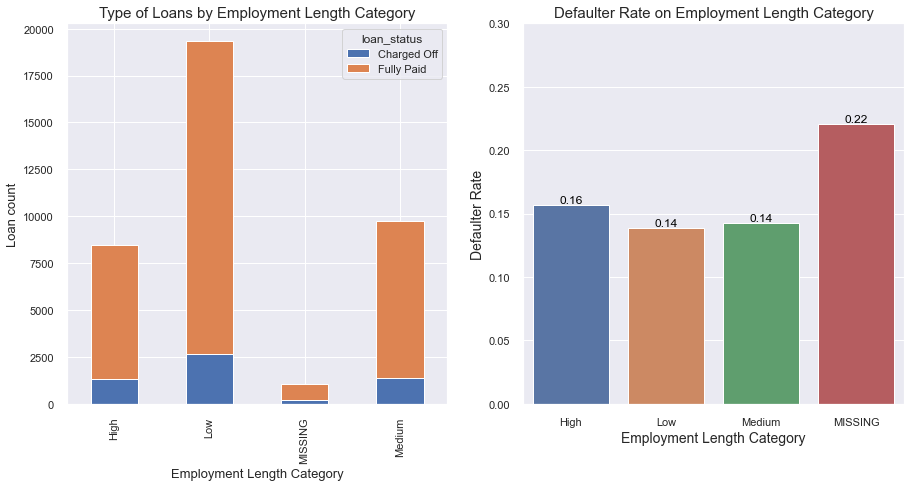

In [100]:
#plotting type of Loans by Employee Length Category
fig, ax = plt.subplots(1,2,figsize=(15, 7))
emp_len.plot(kind='bar',stacked=True,ax=ax[0])
ax[0].set_ylabel('Loan count',fontsize=13)
ax[0].set_xlabel('Employment Length Category',fontsize=13)
ax[0].set_title('Type of Loans by Employment Length Category', fontsize=15)

#Plotting Defaulter Rate on Employment Length Category
sns.barplot(x='emp_length_catg',y='default',data=loan,ax=ax[1],ci=None)
ax[1].set_title('Defaulter Rate on Employment Length Category', fontsize=15)
ax[1].set_ylabel('Defaulter Rate',fontsize=14)
ax[1].set_xlabel('Employment Length Category',fontsize=14)

# ylim max value to be set
y_max = 0.40
ax[1].set_ylim([0, math.floor(y_max)+ 0.3])

# Iterate through the list of axes' patches
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

- The number of `Defaulter rate` is high for applicants having ___"High"___ Employment Length which is weird
- `Missing Category` shows unexpected high Defaulter Rate
- The missing data might be causing unexpected results in the dataset and thus `cannot be used` as a __conclusive variable to predict risky applicant__

<a id=section4031></a>
### Analysis on Purpose

Purpose is a category provided by the borrower for the loan request. 

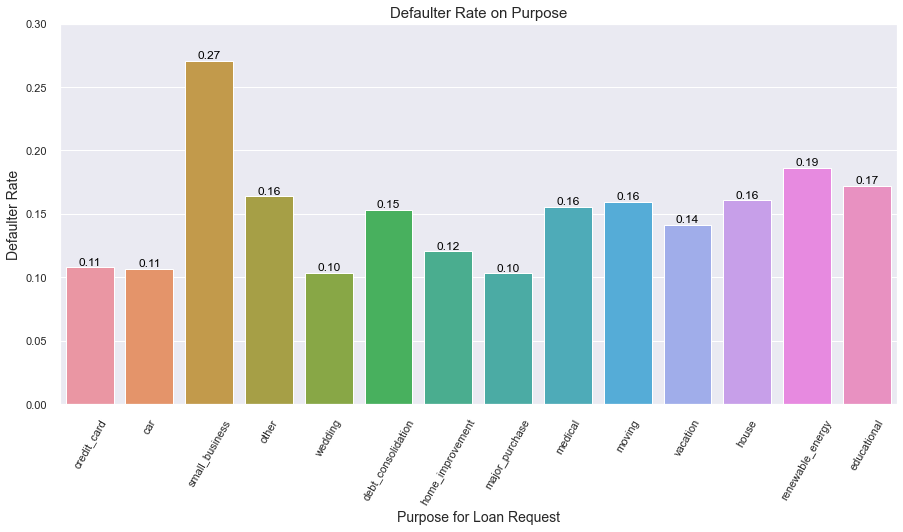

In [101]:
#Plotting Default Rate on Purpose
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x='purpose',y='default',data=loan,ax=ax,ci=None)
ax.set_title('Defaulter Rate on Purpose', fontsize=15)
ax.set_ylabel('Defaulter Rate',fontsize=14)
ax.set_xlabel('Purpose for Loan Request',fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=60)


# ylim max value to be set
y_max = 0.40
ax.set_ylim([0, math.floor(y_max)+ 0.3])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

- The highest Defaulter Rate is for purpose `'small business'` thus making it the most __risky__ purpose for the Loan Application
- Because of so many variations in Defaulter Rate, `purpose` column looks like an important driving factor for the prediction

<a id=section4032></a>
### Analysis on Home Ownership

The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [102]:
## Create a pivot table for loan_Status and home ownership with the values set to number of loan applications
home=pd.pivot_table(data=loan,index='home_ownership',values='id',columns='loan_status',aggfunc='count')



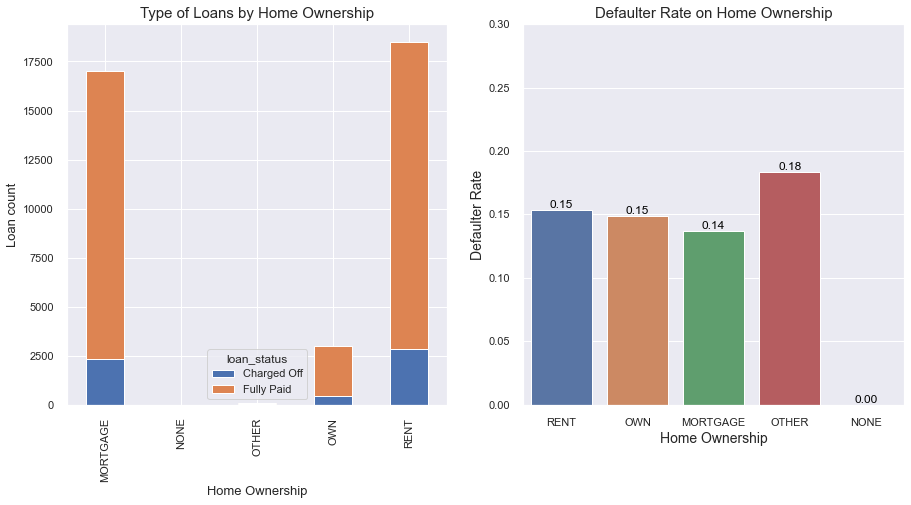

In [103]:
#plotting type of Loans by Home Ownership
fig, ax = plt.subplots(1,2,figsize=(15, 7))
home.plot(kind='bar',stacked=True,ax=ax[0])
ax[0].set_ylabel('Loan count',fontsize=13)
ax[0].set_xlabel('Home Ownership',fontsize=13)
ax[0].set_title('Type of Loans by Home Ownership', fontsize=15)

#Plotting Defaulter Rate on Employee Length Category
sns.barplot(x='home_ownership',y='default',data=loan,ax=ax[1],ci=None)
ax[1].set_title('Defaulter Rate on Home Ownership', fontsize=15)
ax[1].set_ylabel('Defaulter Rate',fontsize=14)
ax[1].set_xlabel('Home Ownership',fontsize=14)

# ylim max value to be set
y_max = 0.40
ax[1].set_ylim([0, math.floor(y_max)+ 0.3])

# Iterate through the list of axes' patches
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

- `Other` Home Ownership has highest Defaulter Rate where as `Mortgage` seems to have the lowest Defaulter Rate

<a id=section4033></a>
### Analysis on Yearly and Montly Loans

In [104]:
## Create a pivot table for loan_Status and Year/month with the values set to number of loan applications
yearly=pd.pivot_table(data=loan,index='issue_yr',values='id',columns='loan_status',aggfunc='count')
monthly=pd.pivot_table(data=loan,index='issue_mnth',values='id',columns='loan_status',aggfunc='count')



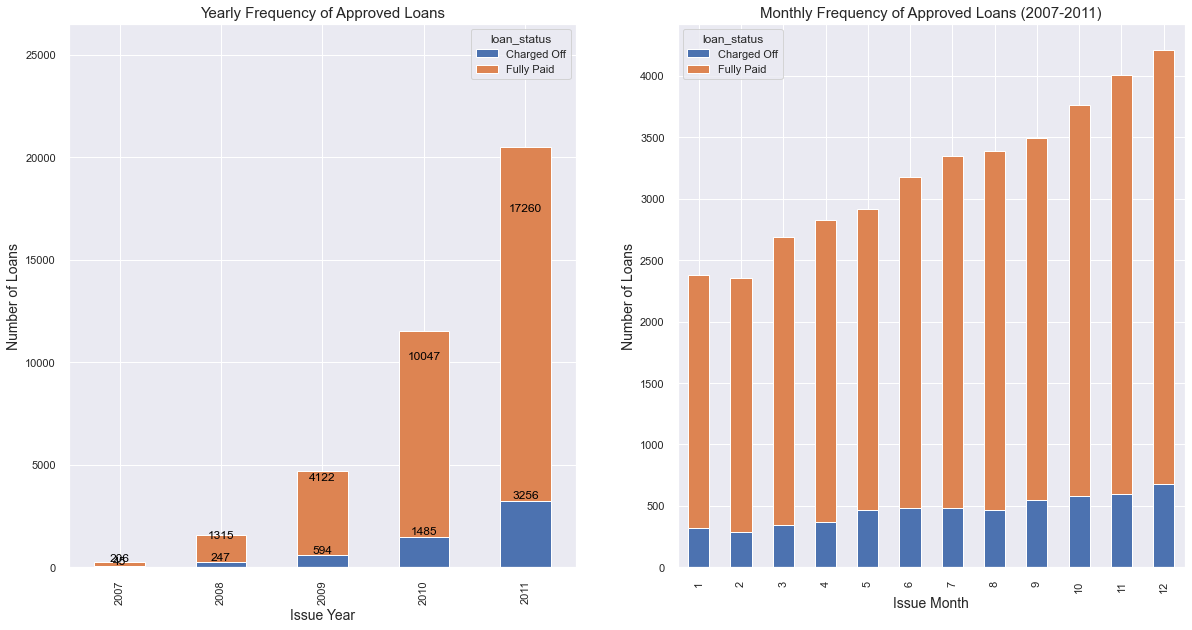

In [105]:
#Plot Distribution of Frequency of Loans Yearly and Monthly

f,ax = plt.subplots(1,2,figsize=(20,10))

yearly.plot(kind='bar',stacked=True,ax=ax[0])
ax[0].set_title('Yearly Frequency of Approved Loans', fontsize=15)
ax[0].set_ylabel('Number of Loans',fontsize=14)
ax[0].set_xlabel('Issue Year',fontsize=14)
# ylim max value to be set
y_max = loan['issue_d'].dt.year.value_counts().max() 
ax[0].set_ylim([0, math.ceil(y_max)+6000])

# Iterate through the list of axes' patches
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

monthly.plot(kind='bar',stacked=True,ax=ax[1])
ax[1].set_title('Monthly Frequency of Approved Loans (2007-2011)', fontsize=15)
ax[1].set_ylabel('Number of Loans',fontsize=14)
ax[1].set_xlabel('Issue Month',fontsize=14)

plt.show()

- Approved Loan count __increses__ `yearly` and `monthly`

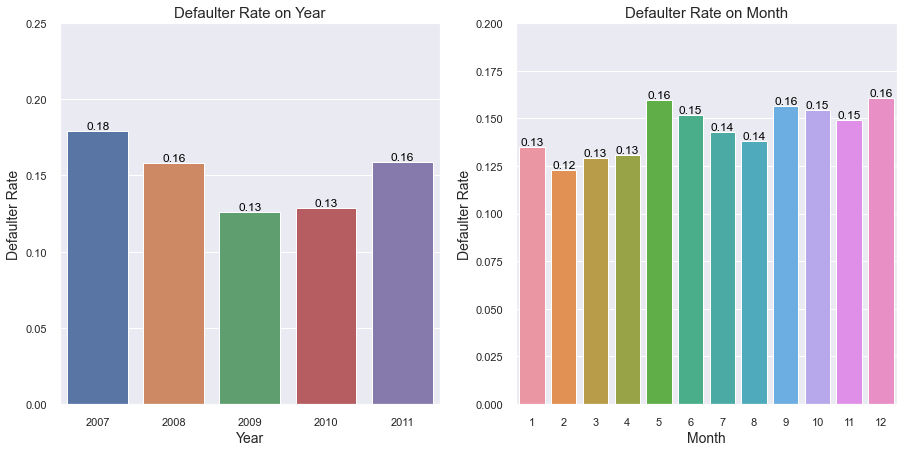

In [106]:
#Plotting Defaulter Rate on Year
fig, ax = plt.subplots(1,2,figsize=(15, 7))


sns.barplot(x='issue_yr',y='default',data=loan,ax=ax[0],ci=None)
ax[0].set_title('Defaulter Rate on Year', fontsize=15)
ax[0].set_ylabel('Defaulter Rate',fontsize=14)
ax[0].set_xlabel('Year',fontsize=14)


# ylim max value to be set
y_max = 0.8
ax[0].set_ylim([0, math.floor(y_max)+ 0.25])

# Iterate through the list of axes' patches
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

#Plotting Defaulter Rate on Months
sns.barplot(x='issue_mnth',y='default',data=loan,ax=ax[1],ci=None)
ax[1].set_title('Defaulter Rate on Month', fontsize=15)
ax[1].set_ylabel('Defaulter Rate',fontsize=14)
ax[1].set_xlabel('Month',fontsize=14)

# ylim max value to be set
y_max = 0.8
ax[1].set_ylim([0, math.floor(y_max)+ 0.2])

# Iterate through the list of axes' patches
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
       
plt.show()

#### Default rate was the highest in the year `'2007'`
#### Default rate is highest in the Month of `May`,`September` and `December`

<a id=section40331></a>
### Analysis on Top Purpose loans for highest Defaulted Months


In [107]:
#Filter Top Defaulted Months (May, September and December)
top_mnth=[5,9,12]

#Check top purpose for the above months
loan[loan.issue_mnth.isin(top_mnth)]['purpose'].value_counts()

debt_consolidation    5055
credit_card           1526
other                  968
home_improvement       799
major_purchase         525
small_business         450
car                    395
wedding                231
medical                209
moving                 157
vacation               107
house                  103
educational             80
renewable_energy        27
Name: purpose, dtype: int64

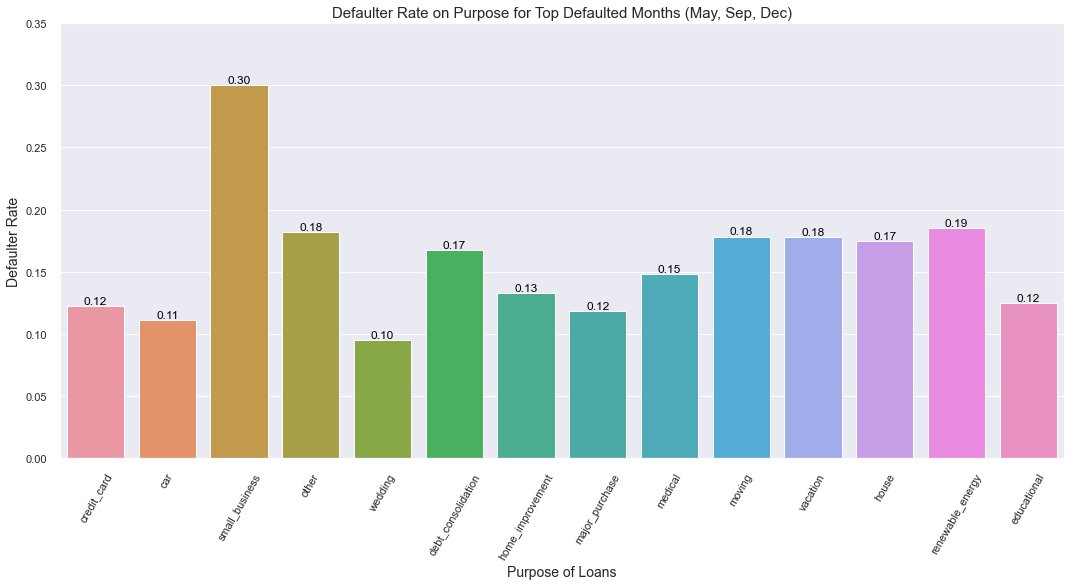

In [108]:
#Plotting Defaulter Rate on Top Purpose Loans for month of May, Sep and Dec
f,ax = plt.subplots(figsize=(18,8))
sns.barplot(x='purpose',y='default',data=loan[loan.issue_mnth.isin(top_mnth)],ax=ax,ci=None)
ax.set_title('Defaulter Rate on Purpose for Top Defaulted Months (May, Sep, Dec)', fontsize=15)
ax.set_ylabel('Defaulter Rate',fontsize=14)
ax.set_xlabel('Purpose of Loans',fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=60)

# ylim max value to be set
y_max = 0.8
ax.set_ylim([0, math.floor(y_max)+ 0.35])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
       
plt.show()

#### The top reasons for Defaulting in the period of `May, September and December` are 
- Applying loan for Small Business
- Applying loan for renewable energy
- Applying loan for vacation, moving and other reasons
- Applying loan for debt consolidation and house

<a id=section4034></a>
### Analysis on derogatory behavior over loan status


In [109]:
#Create new dataframe  group by loan status and derogatory public records
loan_pub = loan.groupby(['loan_status','pub_rec'])['id'].count().reset_index()
loan_pub['pub_rec_perc'] = (loan_pub.id / loan_pub.groupby('loan_status')['id'].transform('sum'))*100
loan_pub

,loan_status,pub_rec,id,pub_rec_perc
0,Charged Off,0,5160,91.700729
1,Charged Off,1,457,8.121557
2,Charged Off,2,10,0.177715
3,Fully Paid,0,31347,95.135053
4,Fully Paid,1,1556,4.722307
5,Fully Paid,2,38,0.115326
6,Fully Paid,3,7,0.021244
7,Fully Paid,4,2,0.006070


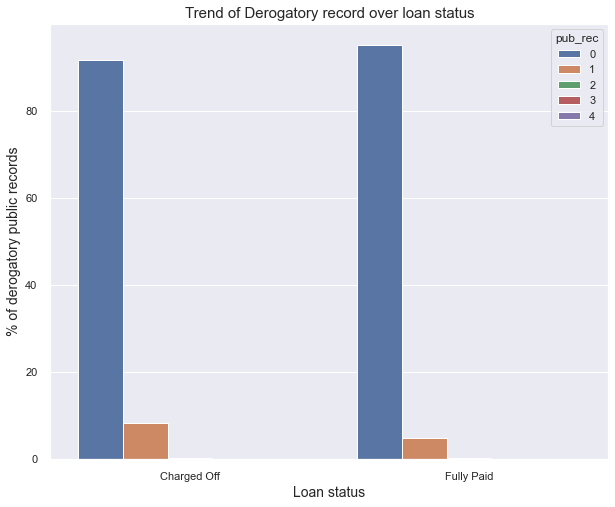

In [110]:
#Plot Derogatory record over Loan status
plt.figure(figsize=(10, 8))
sns.barplot(x="loan_status", y="pub_rec_perc", hue="pub_rec", data=loan_pub)
plt.ylabel("% of derogatory public records", size=14)
plt.xlabel("Loan status", size=14)
plt.title("Trend of Derogatory record over loan status", size=15)
plt.show()


#### Derogatory do not have much difference over the status. `So it can be considered but not that important.`



<a id=section4035></a>
### Analysis on Bankruptcies behavior over loan status


In [111]:
#Create new dataframe  group by loan status and public record bankruptcies
loan_pub_bank = loan.groupby(['loan_status','pub_rec_bankruptcies'])['id'].count().reset_index()
loan_pub_bank['pub_rec_bankruptcies_perc'] = (loan_pub_bank.id / loan_pub_bank.groupby('loan_status')['id'].transform('sum'))*100
loan_pub_bank

,loan_status,pub_rec_bankruptcies,id,pub_rec_bankruptcies_perc
0,Charged Off,0.0,5141,93.320022
1,Charged Off,1.0,366,6.643674
2,Charged Off,2.0,2,0.036304
3,Fully Paid,0.0,31097,96.064379
4,Fully Paid,1.0,1271,3.926354
5,Fully Paid,2.0,3,0.009268


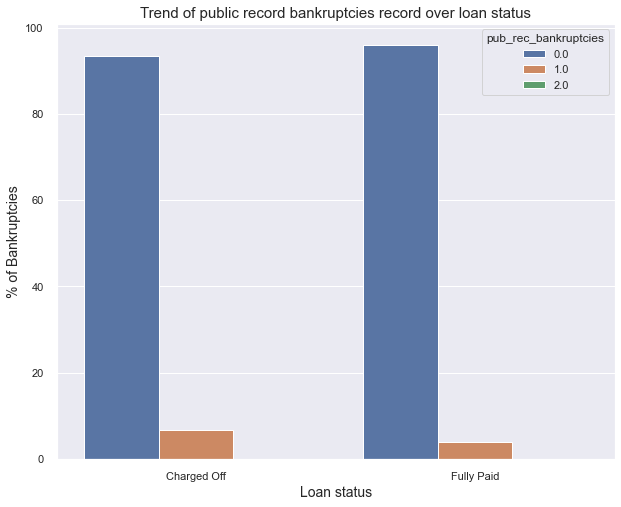

In [112]:
#Plot public record bankruptcies record over Loan status
plt.figure(figsize=(10, 8))
sns.barplot(x="loan_status", y="pub_rec_bankruptcies_perc", hue="pub_rec_bankruptcies", data=loan_pub_bank)
plt.ylabel("% of Bankruptcies", size=14)
plt.xlabel("Loan status", size=14)
plt.title("Trend of public record bankruptcies record over loan status", size=15)
plt.show()

#### Bankruptcies do not have much difference over the status. `So it can be considered but not that important.`





<a id=section4036></a>
### Analysis on loan amount related columns

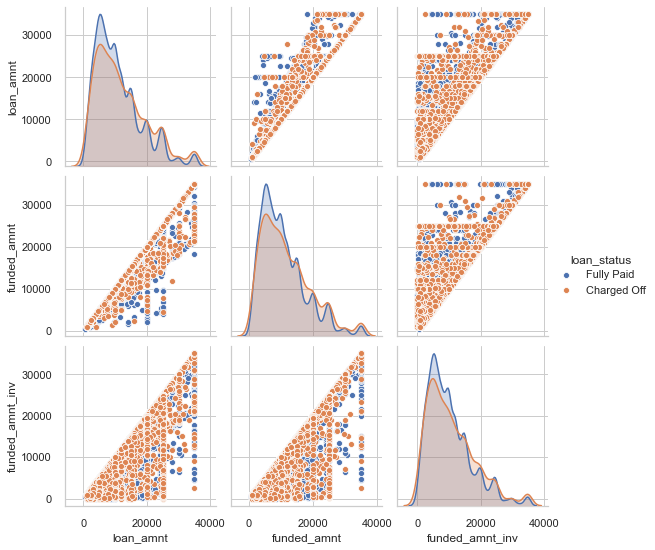

In [113]:
#Plot pairplot for Loan Amount Related Fields
sns.set_style('whitegrid');
sns.pairplot(loan, hue='loan_status', vars=['loan_amnt','funded_amnt','funded_amnt_inv'])
plt.show()

In [114]:
#Create Loan Funded Amount Ratio
loan['loan_fund_ratio'] = loan['funded_amnt']/loan['loan_amnt']
loan['loan_fund_ratio'].describe()

count    38577.000000
mean         0.985954
std          0.069594
min          0.101250
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: loan_fund_ratio, dtype: float64

#### Loan to investment analysis shows that mean, 25,50 & 75 percentile all are `“1”.` 

#### Hence Loan request or loan approved, `either of the two` can be used for analysis as the don’t have no significant difference.




In [115]:
#Create Loan Invested Amount Ratio
loan['loan_inv_ratio'] = loan['funded_amnt_inv']/loan['loan_amnt']
loan['loan_inv_ratio'].describe()

count    38577.000000
mean         0.937877
std          0.173311
min          0.000000
25%          0.982537
50%          0.999343
75%          1.000000
max          1.000000
Name: loan_inv_ratio, dtype: float64

In [116]:
loan['funded_amnt_inv'].describe()

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64



#### It  shows that there is `“0”` investment in some cases. So it is better `not to use` the funded amount invested.



In [117]:
#Create Funded amount to Annual Income Ratio
loan['fund_income_ratio'] = loan['funded_amnt']/loan['annual_inc']
loan['fund_income_ratio'].describe()

count    38577.000000
mean         0.182079
std          0.112286
min          0.000789
25%          0.096226
50%          0.160000
75%          0.245455
max          0.830000
Name: fund_income_ratio, dtype: float64

In [118]:
#Create bucket of Funded Income Category
# Categories are created based on percentile values from above
# High Ratio (>.25)
# Medium Ratio (>.09 and <=.25)
# Low Ratio (<=.25)
loan['fund_income_catg']=loan.fund_income_ratio.apply(lambda x: 'High Ratio' if x>0.25 else ('Medium Ratio' if (x>0.09 and x<=0.25) else 'Low Ratio'))




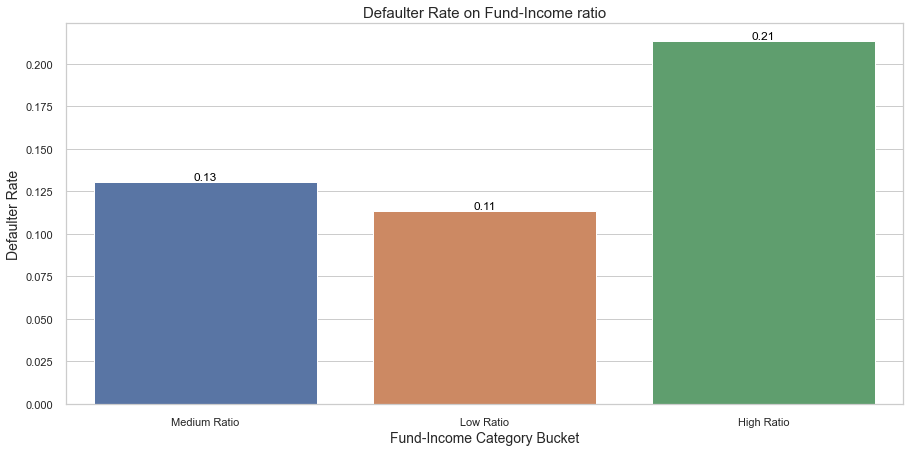

In [119]:
#Plot Defaulter Rate for Fund-Income Ratio 
f,ax = plt.subplots(figsize=(15,7))


sns.barplot(x='fund_income_catg',y='default',data=loan,ax=ax,ci=None)
ax.set_title('Defaulter Rate on Fund-Income ratio', fontsize=15)
ax.set_ylabel('Defaulter Rate',fontsize=14)
ax.set_xlabel('Fund-Income Category Bucket',fontsize=14)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

       
plt.show()



#### Higher the Fund-Income ratio, more chances of being `defaulter`. 

#### Here the difference is significant, so the derived factor of investment to income ratio is `really important`. 



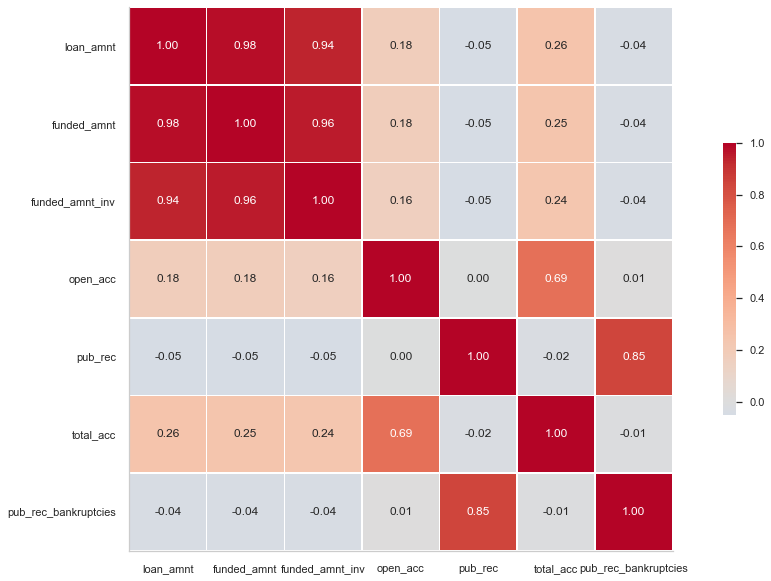

In [120]:
#Correlation between numerical attributes 
plt.figure(figsize=(20,10))
corr = loan[['loan_amnt','funded_amnt','funded_amnt_inv','open_acc',
                                                      'pub_rec','total_acc','pub_rec_bankruptcies']].corr()
g = sns.heatmap(corr,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f', cmap='coolwarm',annot=True)
sns.despine()
g.figure.set_size_inches(18,10)
    
plt.show()

There are lot of __strong positive correlation__ between numerical attributes <br>
 - funded_amnt: (Amount recommended/approved byLending Club) is __highly correlated__ with <br>
     - funded_amnt_inv:  Amount committed by Investors ___[can be dropped]___
     - loan_amnt: Amount applied by Applicant ___[can be dropped]___
    

 - __open_acc__ is __highly correlated__ with __total_acc__ so total_acc can be __dropped__. <br>
 
 - __pub_rec__ is __highly correlated__ with __pub_rec_bankruptcies__ so pub_rec_bankruptcies can be __dropped__. <br>

#### Create Funded amount category to check the Default Rate

In [121]:
#Create bucket of Funded Amount Category
# High Loan Amount(>30K)
# Medium Loan Amount(>10K and <=30K)
# Low Loan Amount (<=10K)
loan['funded_amnt_catg']=loan.annual_inc.apply(lambda x: 'High' if x>30000.0 
                                                      else ('Medium' if (x>10000.0 and x<=30000.0) else 'Low'))



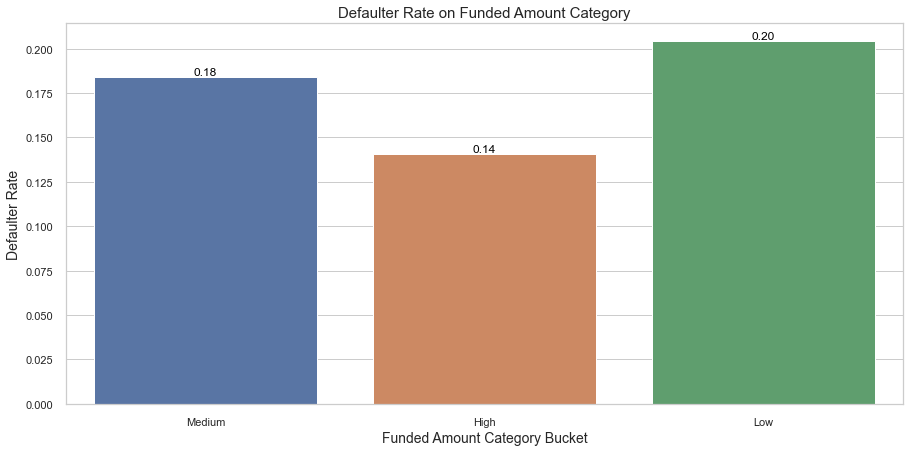

In [122]:
#Plot Defaulter Rate for Fund-Income Ratio 
f,ax = plt.subplots(figsize=(15,7))


sns.barplot(x='funded_amnt_catg',y='default',data=loan,ax=ax,ci=None)
ax.set_title('Defaulter Rate on Funded Amount Category', fontsize=15)
ax.set_ylabel('Defaulter Rate',fontsize=14)
ax.set_xlabel('Funded Amount Category Bucket',fontsize=14)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

       
plt.show()


<a id=section5></a>
<div class="alert alert-block alert-success">
<h2>Conclusion</h2>
</div>

The objective of the EDA is to find the main factors that causes for a loan to be considered a `"Bad Loan"` which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 

There could be many factors like low annual income, high debt to income, high interest rates, low credit grade, among others that contribute in whether a loan is bad or not.

So, Let's summarize the findings from the EDA.

| Numerical Features   | Original/Derived (Feature)  | Findings(Selection/Rejection) |Defaulter Rate Range (Max-Min) |
| ------------- |:-------------                                            | :--------------------- |:--------|
| id          | Original                                        | Rejected (Unique Field) |NA|
| loan_amnt         | Original                         |  Rejected  |NA|
| funded_amnt           | Original                     | Rejected (Low Defaulter Rate Range)|0.06|
| funded_amnt_inv      | Original                       | Rejected  |NA|
| term| Original                                           |Selected|0.14|
| int_rate     | Original |Selected|0.19|
| grade      | Original  |Selected|0.28|
| sub_grade         | Original |Selected|0.43|
| emp_length        | Original             |Rejected (Low Defaulter Rate Range)|0.02|
| home_ownership          | Original            |Rejected (Low Defaulter Rate Range)|0.04|
| annual_inc         | Original                       |Rejected (Low Defaulter Rate Range)|0.06|
| verification_status         | Original    |Rejected (Low Defaulter Rate Range)|0.04|
| issue_d        | Original           |Rejected|NA|
| purpose         | Original                        |Selected|0.17|
| addr_state        | Original             |Rejected|NA|
| dti          | Original            |Selected (Based on Business Intuition)|0.04|
| open_acc         | Original                                              |Rejected|NA|
| pub_rec        | Original           |Rejected|NA|
| total_acc         | Original                        |Rejected|NA|
| pub_rec_bankruptcies           | Original                     |Rejected|NA|
| issue_yr_mnth       | Derived                       |Rejected |NA|
| issue_yr       | Derived                       |Rejected |NA|
| issue_mnth           | Derived               |Selected (Based on Business Intuition) |0.04|
| region         | Derived            |Rejected (Low Defaulter Rate Range)|0.03|
| int_rate_catg      | Derived   |Rejected (original column "int_rate" selected)|NA|
| annual_inc_catg       | Derived |Rejected (original column "annual_inc" selected)|NA|
| emp_length_catg       | Derived                       |Rejected (original column "emp_length" selected)|NA|
| dti_rate_catg           | Derived               |Rejected (original column "dti" selected)|NA|
| loan_fund_ratio         | Derived            |Rejected|NA|
| loan_inv_ratio      | Derived    |Rejected|NA|
| fund_income_ratio       | Derived |Selected|0.10|
| fund_income_catg       | Derived |Rejected (derived column "fund_income_ratio" selected)|NA|

Based on the Defaulter Rate Range ___(Max Defaulter Rate - Min Defaulter Rate)___ and the `cutoff decided greater than 0.06` and based on logical reasoning of variable definition we can conclude the following `driving variables` which are __strong indicators of default__:

- sub_grade 
- grade
- int_rate
- purpose
- term
- fund_income_ratio
- issue_mnth
- dti

### Lets look at more Detailed Reasons for the variables selected

#### Grade and Sub-Grade
It is observed, that the lower the grade & sub grade, borrowers getting defaulted at a higher rate. Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest. Lower the Grade and sub grade, means lesser the loan worthiness and historical data analysis also proves the fact.

<br>

#### Interest Rate
It is observed, that the higher the rate, borrowers getting defaulted at a higher rate. This is derived factor. i.e. rate is defined after analyzing the borrower’s profile and when the loan is approved. So it may not directly influence the decision, but it is a useful tool to analyze the influence of rate on the borrower and the decisions taken. Also it may happen that because of the higher interest rate number of defaulters are increasing.

<br>

#### Purpose
It is observed, that loan taken for a particular purpose i.e. __“small business”__, borrowers getting defaulted at a higher rate. From a business point of view, purpose of the loan taken, plays an important role. The loans are taken to cover some expenditure and hence the usage of the loan also needs to be considered while approving the loan.


<br>

#### Term
It is observed, that at higher term i.e. __“60 months”__ , borrowers getting defaulted at a higher rate. From a reasoning part also, it is possible as people’s financial condition changes over time. And longer term means more interest, and hence it is likely after certain time borrows are not being able to pay back.


<br>

#### Funded Amount to Annual Income Ratio
It is observed, that at higher the ratio i.e. as more loans are being taken compared to income, borrowers getting defaulted at a higher rate. This is quite likely to happen as if borrower starts taking higher amount of loan compared to his/her income, there is a high chance after paying out his/her regular expenses he/she is not being able to payback the loan installment.

<br>

#### Loan Issue Month
It is observed, that when loans are approved on certain months i.e. __May, September and December__, borrowers getting defaulted at a higher rate. Even though the calculated Defaulter rate is low(0.04) yet it will be good idea to be extra careful in loan approval review process during this time. This may happen because __people are getting loans not because of need__, rather because of entertainment as these months follows holiday/festival seasons. After “May” comes summer when people usually goes on vacation. Also “September” and “December” are festival season and holiday season and people may apply for loans to enjoy and fulfill their needs of festival.



<br>

#### Debt-to-Income Rate
Even though the calculated Defaulted Rate is low(0.04) yet it will be good idea to be extra careful on the debt payments on total debt obligation . Over the period of time as the loans are getting paid, the ratio will go down. But as we already have seen that period and __“fund to income ratio”__ plays a vital role in the defaulter list, hence it indirectly influences the dti also. So it is a good idea to keep an eye on dti while approving loan.


<a id=section6></a>
<div class="alert alert-block alert-success">
<h2>Recommendations</h2>
</div>

### Based on the EDA performed above, following recommendations are suggested to Lending Club.

- Applicants with ___higher Sub Grade/Grade___ are __risk__ to Lending Club and the Investors
- Interest Rate above ___"13"___ have more defaulters. So it proves that borrower profile analysis is accurate. At the same it may happen that because of the higher interest rate, number of defaulters are increasing. So company may __re-visit the interest calculation method__.
- The purpose ___'small business'___ is the most risky purpose for the Loan Application
- Term of ___60 months___ has a much higher rate of default
- High fund_income_ratio (Funded amount/Annual income) has a __high risk__ of being default
- Extra care needs to be taken when approving loans during the months of ___May, September & December___ 
- Carefully consider DTI ratio while approving loans
- More analysis can be done on ___States and Zip Codes___ to extract more granular risk impact on the loan applicants

